# Telecom Churn Case Study

## Objective

- To build predictive models to identify customers at high risk of churn and identify the main indicators of churn for the telecom industry. That is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three(6th, 7th and 8th) months considering High Value Customer's data.

In [106]:
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To display all columns
pd.set_option('display.max_columns', None)

In [108]:
# import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

### Read and Understand the data

In [109]:
# Get the data
telecom_data_orig = pd.read_csv("telecom_churn_data.csv")

In [110]:
telecom_data_orig.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [111]:
# Understand the data
telecom_data_orig.shape

(99999, 226)

In [112]:
telecom_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [113]:
# Checking for duplicates
telecom_data_orig['mobile_number'].duplicated().sum()

0

In [114]:
# Set the mobile number as index
telecom_data_orig.set_index('mobile_number', inplace=True)
telecom_data_orig.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,N

In [115]:
# Get the data dimension
telecom_data_orig.shape

(99999, 225)

In [116]:
# Get the list of columns related to recharge
recharge_cols = []
for col in telecom_data_orig.columns.tolist():
     if (('rech' in col) or ('amt' in col) or ('arpu' in col)) and (('date' not in col) and ('day' not in col)):
        recharge_cols.append(col) 

In [117]:
# Get a copy of telecom data
telecom_temp = telecom_data_orig.copy()
telecom_temp.shape

(99999, 225)

In [118]:
telecom_data = telecom_data_orig.copy()

In [119]:
# Check for null values
telecom_temp[recharge_cols].isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9  

In [120]:
# The empty cells are filled with 0.
telecom_temp[recharge_cols] = telecom_temp[recharge_cols].replace(np.nan,0)

In [121]:
telecom_temp[recharge_cols].isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
arpu_3g_9             0
arpu_2g_6             0
arpu_2g_7       

### Get High Value Customers using derived columns

Customers who have spend an average amount more than the 70 percentile of average amount in the first two months are considered as HVCs.

In [122]:
telecom_data['total_amt_6'] = telecom_temp['total_rech_amt_6']+ \
                                        telecom_temp['total_rech_data_6']*telecom_temp['av_rech_amt_data_6']
telecom_data['total_amt_7'] = telecom_temp['total_rech_amt_7']+ \
                                        telecom_temp['total_rech_data_7']*telecom_temp['av_rech_amt_data_7']
                                                                                           
telecom_data['total_amt_8'] = telecom_temp['total_rech_amt_8']+ \
                                        telecom_temp['total_rech_data_8']*telecom_temp['av_rech_amt_data_8']
                                                                                           
telecom_data['total_amt_9'] = telecom_temp['total_rech_amt_9']+ \
                                        telecom_temp['total_rech_data_9']* telecom_temp['av_rech_amt_data_9']
                                                                                   

In [123]:
telecom_data['total_amt_6_7'] =telecom_data['total_amt_6']+telecom_data['total_amt_7']
telecom_data['total_amt_8_9'] =telecom_data['total_amt_8']+telecom_data['total_amt_9']
telecom_data['total_amt_6_9'] = telecom_data['total_amt_6']+telecom_data['total_amt_7'] + \
                                                    telecom_data['total_amt_8']+telecom_data['total_amt_9'] 

In [124]:
telecom_data['total_rech_count_6'] = telecom_temp['av_rech_amt_data_6']+telecom_temp['total_rech_num_6']
telecom_data['total_rech_count_7'] = telecom_temp['av_rech_amt_data_7']+telecom_temp['total_rech_num_7']
telecom_data['total_rech_count_8'] = telecom_temp['av_rech_amt_data_8']+telecom_temp['total_rech_num_8']
telecom_data['total_rech_count_9'] = telecom_temp['av_rech_amt_data_9']+telecom_temp['total_rech_num_9']

In [125]:
telecom_data['av_amt_6_7'] = telecom_data['total_amt_6_7']/(telecom_data['total_rech_count_6']+ \
                                                            telecom_data['total_rech_count_7'])

In [126]:
telecom_data['av_amt_6_7'].isnull().sum()

185

In [127]:
telecom_data['av_amt_6_7'].isnull().sum()

185

In [128]:
telecom_data['av_amt_6_7'] = telecom_data['av_amt_6_7'].replace(np.nan,0) 

In [129]:
telecom_data['av_amt_6_7'].isnull().sum()
telecom_data.shape


(99999, 237)

In [130]:
telecom_hvc = telecom_data[telecom_data['av_amt_6_7']>telecom_data['av_amt_6_7'].quantile(0.7)]
telecom_hvc.shape

(29993, 237)

In [131]:
telecom_hvc = telecom_hvc.replace(np.nan,0) 

In [132]:
telecom_hvc.isnull().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
total_rech_count_6      0
total_rech_count_7      0
total_rech_count_8      0
total_rech_count_9      0
av_amt_6_7              0
Length: 237, dtype: int64

### Get the target column churned/Not churned
Customers who are not using any services incoming/outgoing/internet service definitely will be churned

In [133]:
telecom_hvc.isnull().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
total_rech_count_6      0
total_rech_count_7      0
total_rech_count_8      0
total_rech_count_9      0
av_amt_6_7              0
Length: 237, dtype: int64

### Tagging customers

In [134]:
# Null value check
telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [135]:
# Get the customer list index who has not used any services incoming/outgoing/internet service.
churned_index = telecom_hvc[telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9', \
                                         'vol_3g_mb_9']].max(axis=1) == 0].index
len(churned_index)

3056

So, 3056 customers are are not using any service(incoming/outgoing and internet service), hence these customers are not going to continue with the operator, they are called as churned customers.

In [136]:
telecom_hvc['churn'] = 0
telecom_hvc.loc[churned_index,'churn'] = 1

In [137]:
telecom_hvc['churn'].value_counts()

0    26937
1     3056
Name: churn, dtype: int64

In [138]:
churned_perc = telecom_hvc['churn'].value_counts()[0]/telecom_hvc['churn'].value_counts()[1]
churned_perc

8.81446335078534

#### The churn rate of  high value customers  ~ 9%.

### Preprocessing the Data

The last month in the data, ie, the 9th month is the churned phase, where in the customers would have already decided whether to continue with services. Hence not cosidering the data of 9th month for the analysis.

In [139]:
# Drop the data of churned phase.
churned_phase_cols = []
for col in telecom_hvc.columns.to_list():
    if '_9' in col:
        churned_phase_cols.append(col)

In [140]:
print(" Dropping", churned_phase_cols)
telecom_hvc.drop(churned_phase_cols, axis=1, inplace=True)
telecom_hvc.shape

 Dropping ['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_amt_9',

(29993, 180)

In [141]:
# Get colums with more than 70% null value
null_val_dict = dict(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)).sort_values(ascending=False))
null_val_dict
null_val_cols = []
for col, null_val in null_val_dict.items():
    if null_val_dict[col] > 70.0:
        null_val_cols.append(col)
print("Null value columns with more than 70% --> "+str(len(null_val_cols))+"-->"+str(null_val_cols))

Null value columns with more than 70% --> 0-->[]


In [142]:
# Dropping all coulmns with more than 70% of null values
telecom_hvc_del_null_cols = telecom_hvc.drop(null_val_cols, axis =1)

In [143]:
telecom_hvc_del_null_cols.shape

(29993, 180)

In [144]:
null_val_dict = dict(100*(telecom_hvc_del_null_cols.isnull().sum()/len(telecom_hvc_del_null_cols.index)).sort_values
                     (ascending=False))
null_val_dict

{'churn': 0.0,
 'loc_ic_t2t_mou_8': 0.0,
 'loc_ic_t2t_mou_6': 0.0,
 'total_og_mou_8': 0.0,
 'total_og_mou_7': 0.0,
 'total_og_mou_6': 0.0,
 'og_others_8': 0.0,
 'og_others_7': 0.0,
 'og_others_6': 0.0,
 'spl_og_mou_8': 0.0,
 'spl_og_mou_7': 0.0,
 'spl_og_mou_6': 0.0,
 'isd_og_mou_8': 0.0,
 'isd_og_mou_7': 0.0,
 'isd_og_mou_6': 0.0,
 'std_og_mou_8': 0.0,
 'std_og_mou_7': 0.0,
 'std_og_mou_6': 0.0,
 'std_og_t2c_mou_8': 0.0,
 'std_og_t2c_mou_7': 0.0,
 'std_og_t2c_mou_6': 0.0,
 'loc_ic_t2t_mou_7': 0.0,
 'loc_ic_t2m_mou_6': 0.0,
 'av_amt_6_7': 0.0,
 'loc_ic_t2m_mou_7': 0.0,
 'std_ic_t2o_mou_8': 0.0,
 'std_ic_t2o_mou_7': 0.0,
 'std_ic_t2o_mou_6': 0.0,
 'std_ic_t2f_mou_8': 0.0,
 'std_ic_t2f_mou_7': 0.0,
 'std_ic_t2f_mou_6': 0.0,
 'std_ic_t2m_mou_8': 0.0,
 'std_ic_t2m_mou_7': 0.0,
 'std_ic_t2m_mou_6': 0.0,
 'std_ic_t2t_mou_8': 0.0,
 'std_ic_t2t_mou_7': 0.0,
 'std_ic_t2t_mou_6': 0.0,
 'loc_ic_mou_8': 0.0,
 'loc_ic_mou_7': 0.0,
 'loc_ic_mou_6': 0.0,
 'loc_ic_t2f_mou_8': 0.0,
 'loc_ic_t2f_mou_7':

In [145]:
# Drop all date columns
date_cols =[]
for col in telecom_hvc_del_null_cols.columns.to_list():
    if 'date' in col:
        date_cols.append(col)
print(" Removing date columns "+str(len(date_cols))+str(date_cols))
        

 Removing date columns 9['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [146]:
telecom_hvc_del_null_cols.drop(date_cols, axis = 1, inplace=True)

In [147]:
telecom_hvc_del_null_cols.shape

(29993, 171)

In [148]:
# All empty cells are replaced with 0
telecom_hvc_impute = telecom_hvc_del_null_cols.replace(np.NaN, 0)

In [149]:
null_val_dict = dict(100*(telecom_hvc_impute.isnull().sum()/len(telecom_hvc_impute.index)).sort_values
                     (ascending=False))
null_val_dict

{'churn': 0.0,
 'spl_og_mou_7': 0.0,
 'loc_ic_t2t_mou_6': 0.0,
 'total_og_mou_8': 0.0,
 'total_og_mou_7': 0.0,
 'total_og_mou_6': 0.0,
 'og_others_8': 0.0,
 'og_others_7': 0.0,
 'og_others_6': 0.0,
 'spl_og_mou_8': 0.0,
 'spl_og_mou_6': 0.0,
 'std_og_t2f_mou_8': 0.0,
 'isd_og_mou_8': 0.0,
 'isd_og_mou_7': 0.0,
 'isd_og_mou_6': 0.0,
 'std_og_mou_8': 0.0,
 'std_og_mou_7': 0.0,
 'std_og_mou_6': 0.0,
 'std_og_t2c_mou_8': 0.0,
 'std_og_t2c_mou_7': 0.0,
 'loc_ic_t2t_mou_7': 0.0,
 'loc_ic_t2t_mou_8': 0.0,
 'loc_ic_t2m_mou_6': 0.0,
 'loc_ic_t2m_mou_7': 0.0,
 'std_ic_t2o_mou_6': 0.0,
 'std_ic_t2f_mou_8': 0.0,
 'std_ic_t2f_mou_7': 0.0,
 'std_ic_t2f_mou_6': 0.0,
 'std_ic_t2m_mou_8': 0.0,
 'std_ic_t2m_mou_7': 0.0,
 'std_ic_t2m_mou_6': 0.0,
 'std_ic_t2t_mou_8': 0.0,
 'std_ic_t2t_mou_7': 0.0,
 'std_ic_t2t_mou_6': 0.0,
 'loc_ic_mou_8': 0.0,
 'loc_ic_mou_7': 0.0,
 'loc_ic_mou_6': 0.0,
 'loc_ic_t2f_mou_8': 0.0,
 'loc_ic_t2f_mou_7': 0.0,
 'loc_ic_t2f_mou_6': 0.0,
 'loc_ic_t2m_mou_8': 0.0,
 'std_og_t2c_m

In [150]:
# Check for categorical columns
cat_cols = list(telecom_hvc_impute.select_dtypes(exclude = ['int64', 'float64']).columns)
cat_cols

[]

In [151]:
# creating a dictionary with column and number of  values
high_value_dict = {}
for x in telecom_hvc_impute.columns.tolist():
    l = round(100*(telecom_hvc_impute[x].value_counts().iloc[0]/len(telecom_hvc_impute)))
    high_value_dict[x] = l

In [152]:
high_df = pd.DataFrame.from_dict(high_value_dict, orient = 'index')

In [153]:
# Dropping all high skewed columns
telecom_hvc_2 = telecom_hvc_impute.drop(high_df[high_df[0] >= 99].index,axis = 1)

In [154]:
telecom_hvc_2.shape

(29993, 126)

In [155]:
# Convert month name to column names
telecom_hvc_2.rename(columns = {'aug_vbc_3g':'vbc_3g_8','jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7',
                                'sep_vbc_3g':'vbc_3g_9'},inplace = True)

In [156]:
telecom_hvc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 126 entries, arpu_6 to churn
dtypes: float64(110), int64(16)
memory usage: 29.1 MB


In [157]:
list(telecom_hvc_2.select_dtypes(include = 'object').columns)

[]

In [158]:
for column in telecom_hvc_2.select_dtypes(include = 'object').columns:
    telecom_hvc_2[column] = telecom_hvc_2[column].astype('datetime64[ns]')

In [159]:
float_cols = list(telecom_hvc_2.select_dtypes(include='float64').columns)

In [160]:
telecom_hvc_2[float_cols].dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
                       ...   
total_amt_6_7         float64
total_rech_count_6    float64
total_rech_count_7    float64
total_rech_count_8    float64
av_amt_6_7            float64
Length: 110, dtype: object

### Data Exploration and EDA

In [161]:
print(telecom_hvc_2.churn.value_counts())
print('*'*40)
print(100*telecom_hvc_2.churn.value_counts()/len(telecom_hvc_2))

0    26937
1     3056
Name: churn, dtype: int64
****************************************
0    89.810956
1    10.189044
Name: churn, dtype: float64


We can see that 10% of the high value customers are churn customers

In [162]:
# Derived column --> difference from consecutive months
telecom_hvc_2['diff_total_og_6_7'] = telecom_hvc_2['total_og_mou_6'] - telecom_hvc_2['total_og_mou_7']
telecom_hvc_2['diff_total_og_7_8'] = telecom_hvc_2['total_og_mou_7'] - telecom_hvc_2['total_og_mou_8']
telecom_hvc_2['diff_total_og_6_8'] = telecom_hvc_2['total_og_mou_6'] - telecom_hvc_2['total_og_mou_8']

In [163]:
telecom_hvc_2[['total_amt_6','total_amt_7','total_amt_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_amt_6,total_amt_7,total_amt_8
count,29993.000000,29993.000000,29993.000000
mean,440.375404,425.982779,416.890591
std,596.637440,656.757608,734.261762
min,0.000000,0.000000,0.000000
25%,200.000000,171.000000,130.000000
50%,330.000000,320.000000,296.000000
75%,550.000000,536.000000,548.000000
90%,872.000000,862.000000,887.000000
95%,1130.000000,1126.400000,1170.000000
99%,1961.320000,1968.640000,2074.480000


In [164]:
telecom_hvc_2[['total_amt_6','total_amt_7','total_amt_8','churn']].median()

total_amt_6    330.0
total_amt_7    320.0
total_amt_8    296.0
churn            0.0
dtype: float64

In total rech amount, slight down trend but not too steep of a decline

### Derived column: difference from consecutive months

In [165]:
telecom_hvc_2['diff_amt_6_7'] = telecom_hvc_2['total_amt_6'] - telecom_hvc_2['total_amt_7']
telecom_hvc_2['diff_amt_7_8'] = telecom_hvc_2['total_amt_7'] - telecom_hvc_2['total_amt_8']
telecom_hvc_2['diff_amt_6_8'] = telecom_hvc_2['total_amt_6'] - telecom_hvc_2['total_amt_8']

In [166]:
telecom_hvc_2[['diff_amt_6_7','diff_amt_7_8','diff_amt_6_8','churn']].groupby('churn').mean()

,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
churn,,,
0,-1.602703,-12.713517,-14.316219
1,155.382853,201.297775,356.680628


We can see that in case of the non churn customers the mean of the difference in recharges is negative indicating that the recharge amount is increasing with number of months, where as we can see that there is a huge decrease in case of churn customers

In [167]:
telecom_hvc_2[['total_rech_count_6','total_rech_count_7','total_rech_count_8']].describe(percentiles = 
                                                                                         [0.25,0.5,0.75,0.9,0.95,0.99])

,total_rech_count_6,total_rech_count_7,total_rech_count_8
count,29993.000000,29993.000000,29993.000000
mean,6.452289,6.151852,15.674982
std,9.224670,10.234594,56.102442
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000
50%,5.000000,5.000000,4.000000
75%,8.000000,7.000000,8.000000
90%,12.000000,12.000000,20.000000
95%,16.000000,15.000000,61.000000
99%,28.000000,27.000000,259.000000


More of less same through the 3 months

### total_rech_count vs churn

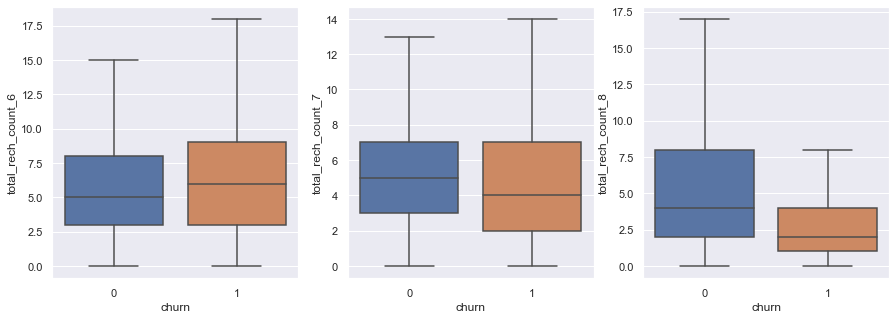

In [168]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_rech_count_6','total_rech_count_7','total_rech_count_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [169]:
telecom_hvc_2[['total_rech_count_6','total_rech_count_7','total_rech_count_8','churn']].groupby('churn').median()

,total_rech_count_6,total_rech_count_7,total_rech_count_8
churn,,,
0,5.0,5.0,4.0
1,6.0,4.0,2.0


Number recharges also follow the similar trend of the recharge amounts

### Incoming calls

In [170]:
[col for col in telecom_hvc_2.columns if 'ic' in col]

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

In [171]:
telecom_hvc_2[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,233.867798,236.446646,225.511518
std,289.822832,289.327448,282.969040
min,0.000000,0.000000,0.000000
25%,65.030000,68.490000,57.090000
50%,154.980000,156.590000,147.360000
75%,300.480000,302.210000,291.680000
90%,522.830000,526.256000,514.510000
95%,719.014000,724.174000,714.190000
99%,1310.470400,1341.648000,1319.779600


In [172]:
telecom_hvc_2[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].median()

total_ic_mou_6    154.98
total_ic_mou_7    156.59
total_ic_mou_8    147.36
dtype: float64

No observable trend, it is almost constant

### total_ic vs churn

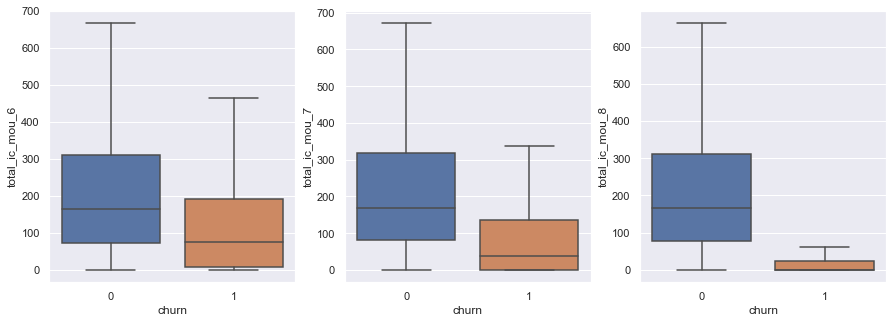

In [173]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [174]:
telecom_hvc_2[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']].groupby('churn').median()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,163.440,169.74,166.06
1,74.865,38.25,0.00


#### We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month

In [175]:
telecom_hvc_2[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,185.382533,185.505296,177.899756
std,244.907919,239.662702,232.914501
min,0.000000,0.000000,0.000000
25%,42.340000,44.440000,36.160000
50%,115.130000,116.760000,110.610000
75%,240.910000,240.790000,233.990000
90%,430.850000,427.160000,418.638000
95%,594.372000,593.700000,588.444000
99%,1097.342000,1085.906000,1069.068000


In [176]:
telecom_hvc_2[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].median()

loc_ic_mou_6    115.13
loc_ic_mou_7    116.76
loc_ic_mou_8    110.61
dtype: float64

### loc_ic vs churn

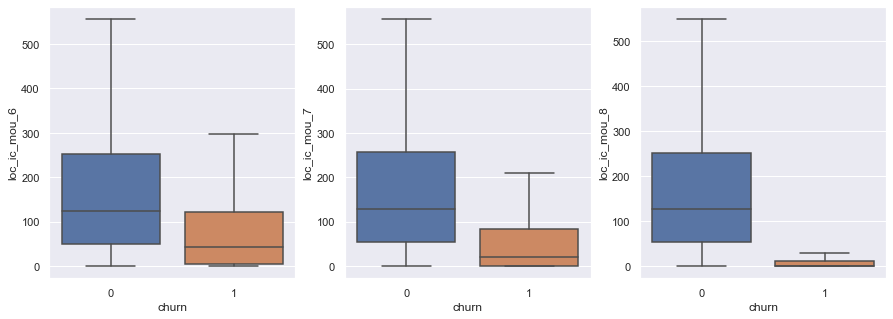

In [177]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [178]:
telecom_hvc_2[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']].groupby('churn').median()

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
churn,,,
0,124.790,129.130,127.34
1,41.745,20.375,0.00


We can see that the non churn customers have almost similar median through the period where as, for churn customers, it is almost 0 in the 8th month

### std incoming

In [179]:
telecom_hvc_2[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,37.936958,39.577909,36.753154
std,108.176457,114.381774,112.548092
min,0.000000,0.000000,0.000000
25%,0.910000,0.810000,0.350000
50%,9.880000,10.000000,8.080000
75%,34.710000,36.490000,33.160000
90%,89.588000,91.974000,85.504000
95%,152.800000,158.234000,149.730000
99%,429.234000,456.435600,428.302000


In [180]:
telecom_hvc_2[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].median()

std_ic_mou_6     9.88
std_ic_mou_7    10.00
std_ic_mou_8     8.08
dtype: float64

No noticable observations

### std_ic Vs churn

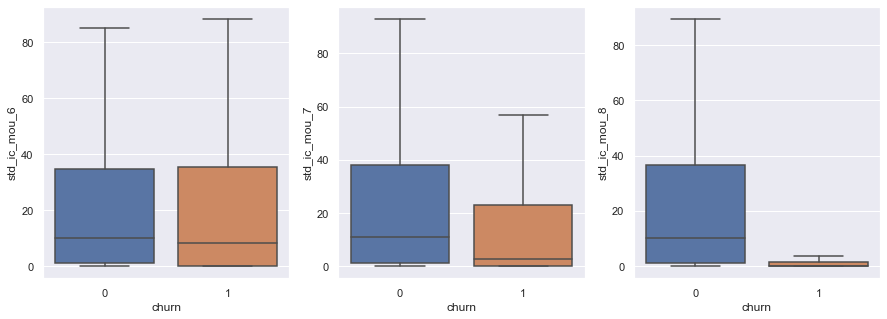

In [181]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [182]:
telecom_hvc_2[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']].groupby('churn').median()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
churn,,,
0,10.010,10.91,10.08
1,8.215,2.53,0.00


#### We can see that the non churn customers have almost similar median through the period. Where as for churn customers, it is almost 0 in the 8th month

### roam_og Vs churn

In [183]:
telecom_hvc_2[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,13.595912,10.059392,9.078529
std,69.552973,60.862585,54.549054
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,21.860000,11.590000,10.910000
95%,65.274000,41.542000,38.598000
99%,284.372400,218.292000,201.088400


In [184]:
telecom_hvc_2[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].mean()

roam_ic_mou_6    13.595912
roam_ic_mou_7    10.059392
roam_ic_mou_8     9.078529
dtype: float64

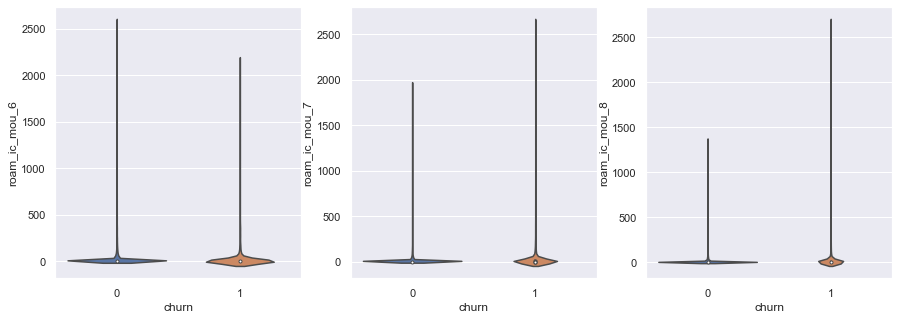

In [185]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()


In [186]:
telecom_hvc_2[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']].groupby('churn').mean()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
churn,,,
0,12.126043,8.214641,7.565554
1,26.552012,26.319879,22.414588


#### The customers who have churned, have large amount of roaming incoming calls than the non churned customers

### Out going calls - total_og vs churn

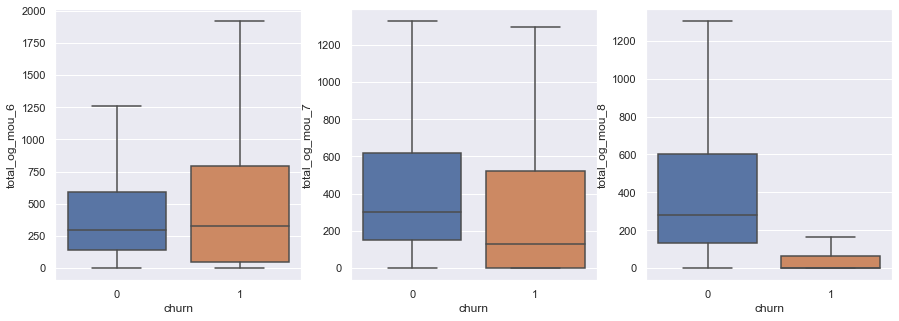

In [187]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_og_mou_6','total_og_mou_7','total_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [188]:
telecom_hvc_2[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']].groupby('churn').median()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,292.19,299.880,282.28
1,328.66,130.275,0.00


#### In the intial month the median oc calls is similar, but it kept decreasing very steep through the months.

### From Derived columns

In [189]:
telecom_hvc_2['diff_total_og_6_7'] = telecom_hvc_2['total_og_mou_6'] - telecom_hvc_2['total_og_mou_7']
telecom_hvc_2['diff_total_og_7_8'] = telecom_hvc_2['total_og_mou_7'] - telecom_hvc_2['total_og_mou_8']
telecom_hvc_2['diff_total_og_6_8'] = telecom_hvc_2['total_og_mou_6'] - telecom_hvc_2['total_og_mou_8']

In [190]:
telecom_hvc_2[['diff_total_og_6_7','diff_total_og_7_8','diff_total_og_6_8','churn']].groupby('churn').mean()

,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8
churn,,,
0,-23.990836,17.150665,-6.840172
1,165.530517,270.267543,435.798060


Churn customers tend to make less number of calls in consecutive months

### Local outgoing - loc_og vs churn

In [191]:
telecom_hvc_2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,200.915926,198.697392,188.648116
std,288.217994,284.263055,285.428089
min,0.000000,0.000000,0.000000
25%,36.260000,37.440000,27.090000
50%,115.980000,115.340000,104.230000
75%,255.040000,249.490000,240.240000
90%,472.430000,466.534000,454.504000
95%,683.148000,673.740000,662.506000
99%,1319.512400,1314.182000,1297.506800


In [192]:
telecom_hvc_2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].median()

loc_og_mou_6    115.98
loc_og_mou_7    115.34
loc_og_mou_8    104.23
dtype: float64

og calls are almost same where as there is a slight dip in the final month

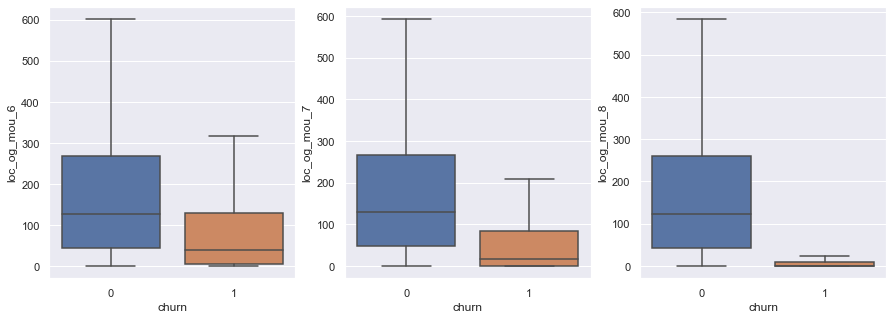

In [193]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [194]:
telecom_hvc_2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']].groupby('churn').median()

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
churn,,,
0,125.84,128.630,122.51
1,39.03,16.915,0.00


#### For churn customers it is almost 0 in the 8th month and also they have significantly lower og calls when compared to non churn cutomers

### std outgoing - std_og Vs churn

In [195]:
telecom_hvc_2[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,std_og_mou_6,std_og_mou_7,std_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,276.097448,282.656781,249.899898
std,522.965017,542.637007,522.911162
min,0.000000,0.000000,0.000000
25%,1.630000,1.050000,0.000000
50%,45.310000,42.640000,26.630000
75%,324.160000,332.110000,262.010000
90%,846.994000,875.910000,786.256000
95%,1274.712000,1322.660000,1214.310000
99%,2438.496000,2539.339600,2374.200800


In [196]:
telecom_hvc_2[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].median()

std_og_mou_6    45.31
std_og_mou_7    42.64
std_og_mou_8    26.63
dtype: float64

The std og calls are almost same in the first two months,and there is a sharp decrease in the 8th month

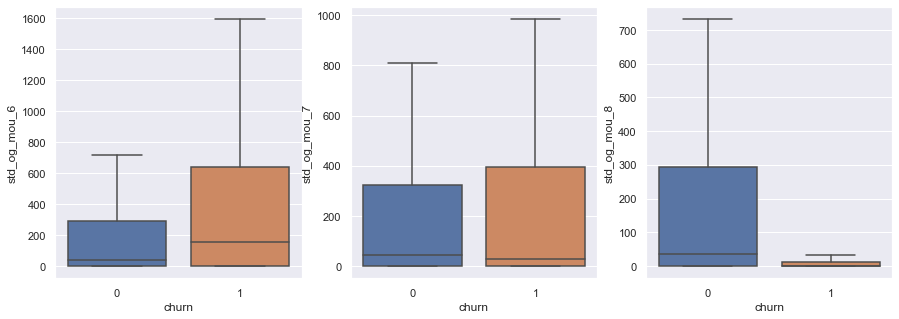

In [197]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_og_mou_6','std_og_mou_7','std_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [198]:
telecom_hvc_2[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']].groupby('churn').median()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,41.230,43.660,36.09
1,153.495,28.815,0.00


The non churn customers have almost similar median through the period, where as for churn customers it is almost 0 in the 8th month.

### roam outgoing

In [199]:
telecom_hvc_2[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,22.476352,16.394742,15.199044
std,98.141185,81.450286,89.587733
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,43.806000,26.856000,20.274000
95%,120.986000,80.124000,69.188000
99%,446.507600,344.198000,320.041200


In [200]:
telecom_hvc_2[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mean()

roam_og_mou_6    22.476352
roam_og_mou_7    16.394742
roam_og_mou_8    15.199044
dtype: float64

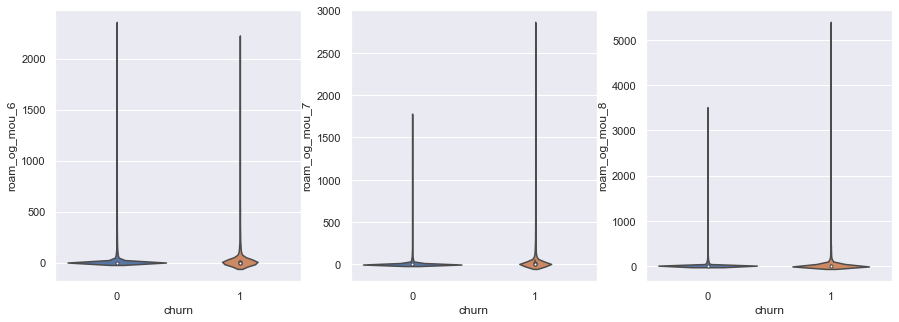

In [201]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [202]:
telecom_hvc_2[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']].groupby('churn').mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,20.129538,13.821743,13.045639
1,43.162258,39.074355,34.180154


#### The churned customers, the progession of their roam outgoing calls have decreased.

### Age On Network - Aon vs churn

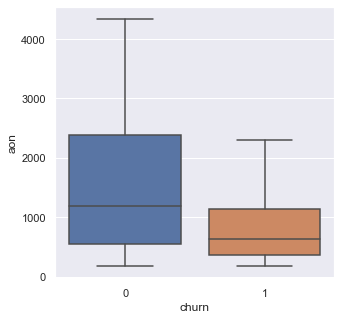

In [203]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'churn',y = 'aon',data = telecom_hvc_2,showfliers = False)
plt.show()

In [204]:
telecom_hvc_2[['aon','churn']].groupby('churn').median()

,aon
churn,
0,1184
1,630


The age on network of people who chrun is almost half of that of the non churn customers.

### onnet Vs churn

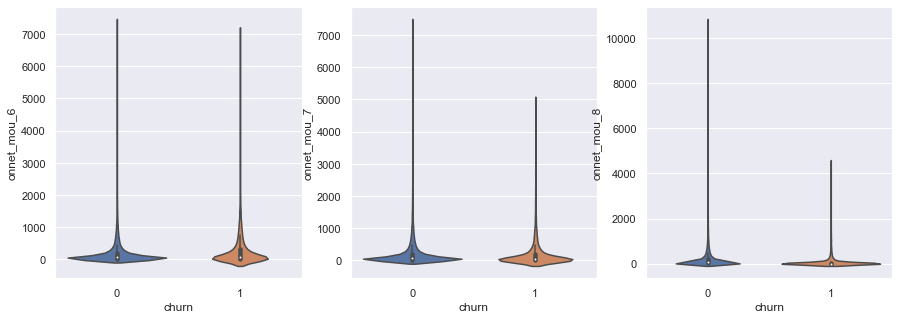

In [205]:
plt.figure(figsize = (15,5))
i = 1
for col in ['onnet_mou_6','onnet_mou_7','onnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [206]:
telecom_hvc_2[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']].groupby('churn').mean()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
churn,,,
0,197.755435,207.145691,200.664665
1,276.004346,196.484575,73.881803


#### The customers who have churned has a decreasing onnnet calls per month as we move from 6 to 8th months.

### offnet Vs churn

In [207]:
telecom_hvc_2[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,29993.000000,29993.000000,29993.000000
mean,297.927422,295.803861,270.019012
std,402.515092,418.322913,410.521989
min,0.000000,0.000000,0.000000
25%,81.690000,75.690000,58.240000
50%,174.530000,169.390000,149.510000
75%,353.160000,348.310000,323.240000
90%,679.234000,677.180000,628.756000
95%,1003.150000,1002.980000,925.070000
99%,1972.165600,2044.945600,1901.968000


In [208]:
telecom_hvc_2[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean()

offnet_mou_6    297.927422
offnet_mou_7    295.803861
offnet_mou_8    270.019012
dtype: float64

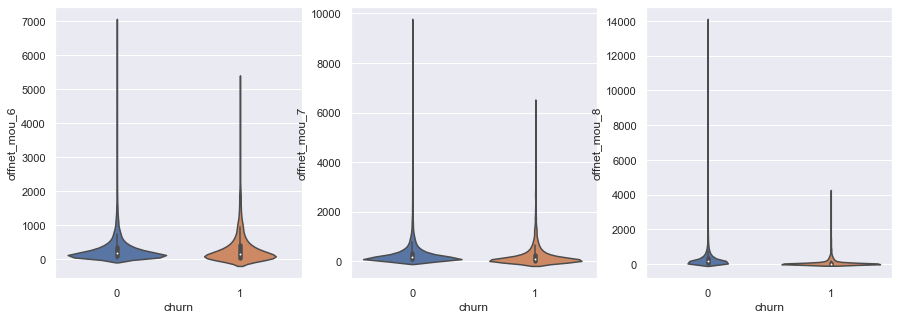

In [209]:
plt.figure(figsize = (15,5))
i = 1
for col in ['offnet_mou_6','offnet_mou_7','offnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_2,showfliers = False)
    i = i+1
plt.show()

In [210]:
telecom_hvc_2[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']].groupby('churn').mean()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
churn,,,
0,293.943998,301.804984,290.294512
1,333.039166,242.907179,91.301355


#### The customers churing customers have a decreasing offnet calls per month as we move from 6 to 8th months.

### Correlated variables

In [211]:
ic_cols = [col for col in telecom_hvc_2.columns if '_ic' in col]
ic_cols.append('churn')

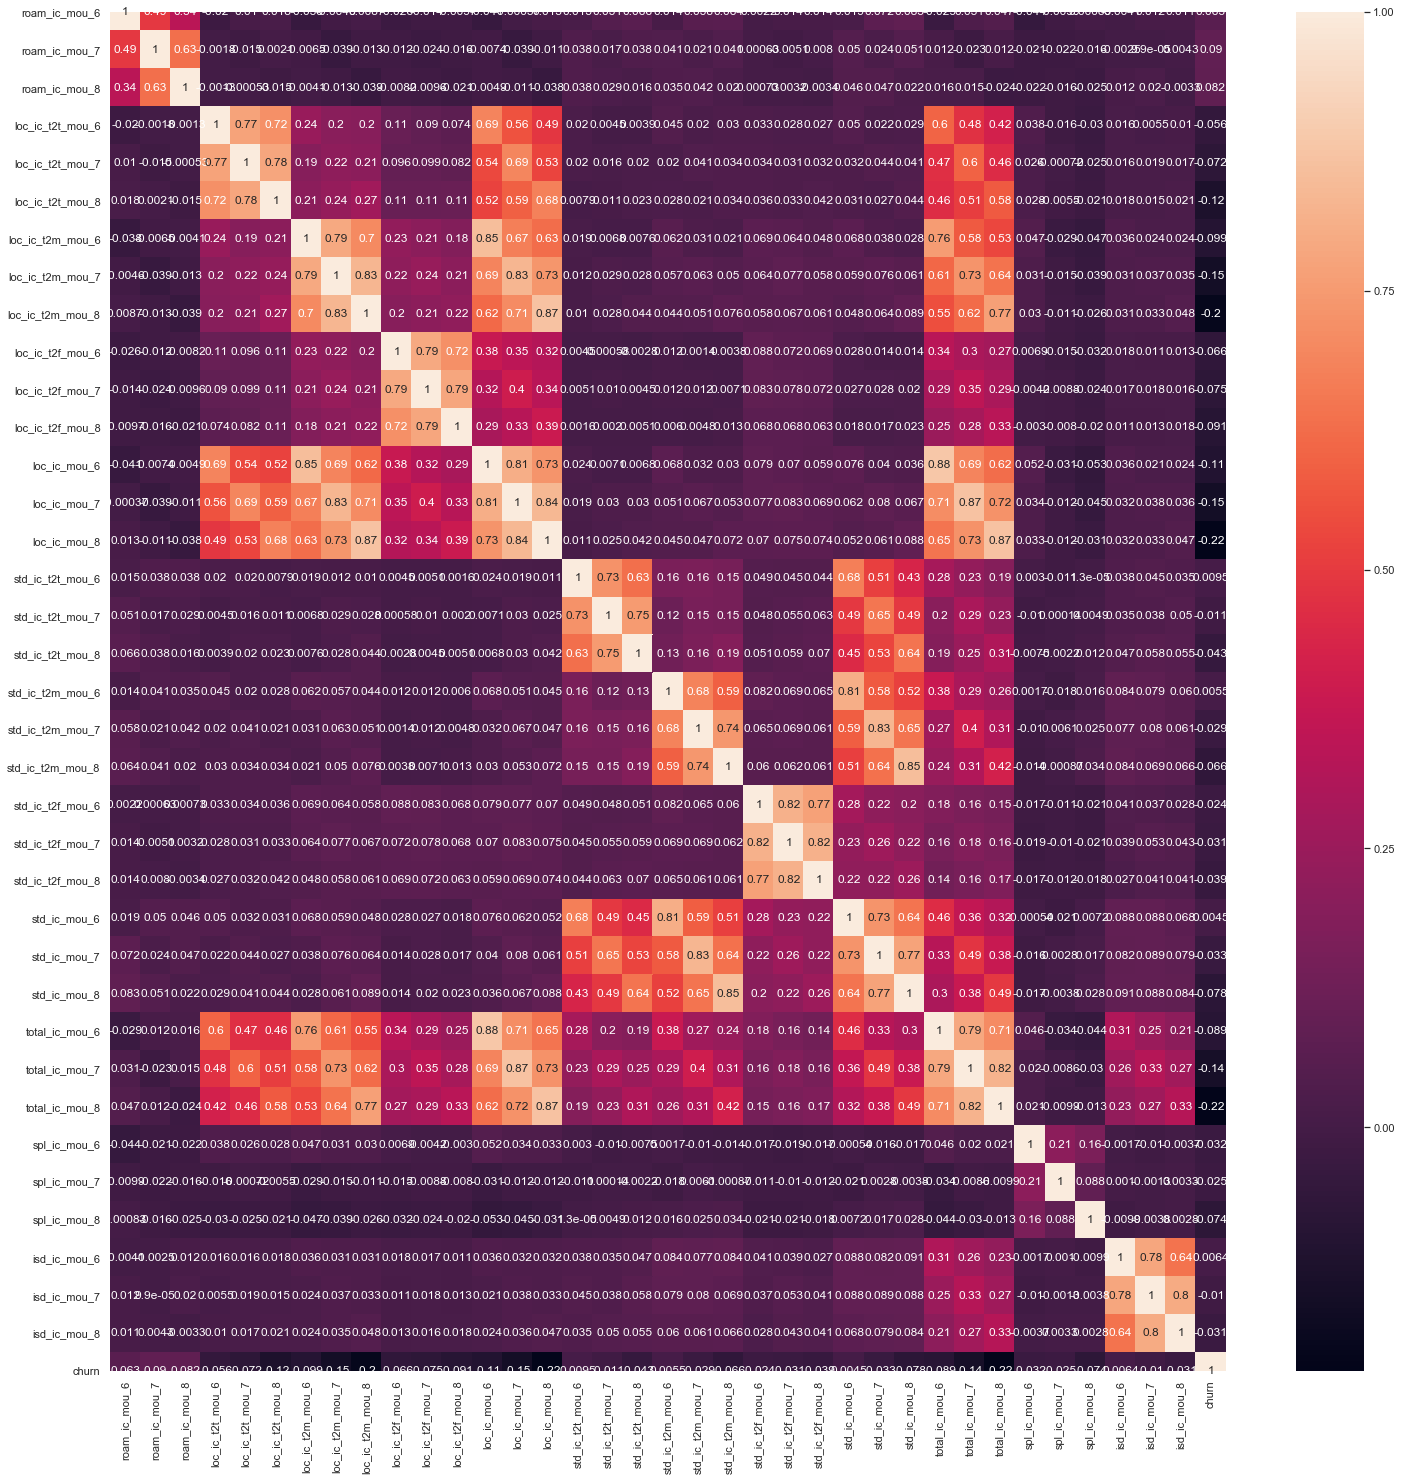

In [212]:
plt.figure(figsize = (25,25))
sns.heatmap(telecom_hvc_2[ic_cols].corr(),annot = True)
plt.show()

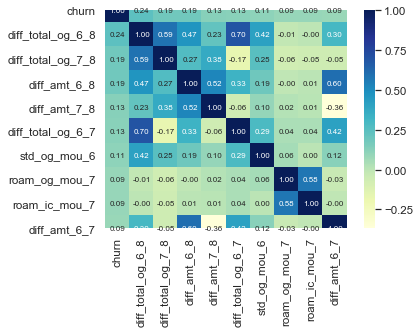

In [213]:
# Get the top 10 independent variables with high correlation coefficient.
k = 10
cols = telecom_hvc_2.corr().nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(telecom_hvc_2[cols].values.T)
sns.set(font_scale=1.05)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 8}, \
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

So, the variables correlated with target variable (churn) are not clear, It requires detailed analysis.

In [214]:
# Handling class imbalance
X = telecom_hvc_2.drop('churn',axis=1)
y = telecom_hvc_2.churn

In [215]:
y.value_counts()


0    26937
1     3056
Name: churn, dtype: int64

In [216]:
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_6,total_amt_7,total_amt_8,total_amt_6_7,total_rech_count_6,total_rech_count_7,total_rech_count_8,av_amt_6_7,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0.00,0.00,0.00,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.00,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.00,0.00,46.56,236.84,96.84,0.45,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.00,0.0,0.00,0.85,0.00,0.93,3.14,0.00,5,4,2,168,315,116,86,200,86,0,200,86,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0.0,1103,0.00,0.00,4.17,0.0,168.0,315.0,116.0,483.0,5.0,4.0,2.0,53.666667,-257.61,127.48,-130.13,-147.0,199.0,52.0
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0.0,802,57.74,19.38,18.74,0.0,1580.0,790.0,3638.0,2370.0,5.0,5.0,7.0,237.000000,-121.71,259.08,137.37,790.0,-2848.0,-2058.0
7002006969,298.126,21.000,131.617,439.06,0.00,0.00,160.16,14.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.63,0.00,0.00,47.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,74.08,0.00,0.00,412.43,0.00,0.00,97.96,14.01,0.00,0.00,0.00,0.00,510.39,14.01,0.00,0.0,0.00,0.00,14.74,0.00,0.00,0.00,599.23,14.01,0.00,24.39,3.33,17.18,33.64,61.33,84.19,0.00,0.46,4.18,58.04,65.13,105.56,44.88,1.53,7.99,6.91,13.16,18.01,0.00,1.75,0.00,51.79,16.44,26.01,11

In [217]:
# To handle data imbalance
smote = SMOTE(random_state = 28)
X_balanced, y_balanced = smote.fit_sample(X, y.ravel())

SMOTE handled the class imbalance

### Test train split and Feature scaling

In [218]:
index_list = []
for x in range(1,len(X_balanced)+1):
    index_list.append('I'+str(x))

In [219]:
X_balanced = pd.DataFrame(X_balanced,columns = X.columns)

In [220]:
X_balanced.index = index_list

In [221]:
y_balanced = pd.Series(y_balanced,index = index_list)

In [222]:
y_balanced.index = index_list

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced, train_size = 0.8,test_size = 0.2,\
                                                 stratify = y_balanced,random_state = 28)

In [224]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [225]:
X_train.shape

(43099, 131)

In [226]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_train_scaled.index = X_train.index

In [227]:
X_train_scaled.shape

(43099, 131)

In [228]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_6,total_amt_7,total_amt_8,total_amt_6_7,total_rech_count_6,total_rech_count_7,total_rech_count_8,av_amt_6_7,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
I12699,-0.053592,-0.037144,0.314065,0.046767,-0.042709,0.111741,-0.086415,-0.329803,-0.182991,-0.213351,-0.110127,0.004174,-0.255868,-0.216088,-0.200070,-0.378751,-0.333530,-0.298459,-0.468038,-0.492513,-0.446779,-0.192939,-0.168979,-0.23932,-0.226633,-0.195361,-0.166412,-0.541021,-0.527327,-0.472900,0.199934,0.103772,0.273511,0.183940,-0.103210,0.086688,-0.154149,-0.138835,-0.131267,0.254750,-0.002651,0.231653,-0.051506,-0.039048,-0.029707,-0.266676,-0.228701,-0.212942,-0.091997,0.016147,-0.220275,-0.018110,-0.387674,-0.227954,-0.034410,-0.493579,-0.629191,-0.427906,-0.290517,-0.231867,-0.222879,-0.565419,-0.564815,-0.347578,-0.239722,-0.228757,-0.189801,-0.106263,-0.249127,0.034763,-0.124909,-0.12247,-0.105179,-0.218674,-0.315806,-0.073891,-0.588763,-0.620178,-0.339489,-0.405592,-0.186733,-0.186427,-0.153702,-0.148114,-0.119366,-0.069705,-0.085418,-0.054497,0.691663,0.752747,0.616422,0.094181,-0.216842,0.334051,-0.134145,-0.054643,0.244471,0.247678,-0.695276,-0.521905,-0.149946,-0.167469,-0.159432,-0.071158,-0.148244,-0.08265,-0.070992,-0.073593,-0.07949,-0.094355,-0.130335,-0.185641,-0.732325,-0.098325,-0.102805,-0.11534,-0.042508,0.078812,-0.183186,0.224259,-0.060062,0.388969,0.350829,-0.087380,-0.530959,0.272680,-0.269001,0.029919,0.274907,-0.531039,-0.156936
I17582,-0.077781,0.687869,0.677024,0.534109,1.662690,2.047517,-0.624506,-0.261950,-0.079653,0.617823,-0.196359,-0.195291,0.207176,-0.255720,-0.222477,-0.289869,-0.076242,0.288831,-0.475220,-0.355454,0.043670,-0.185612,-0.211165,-0.23932,-0.226633,-0.195361,-0.166412,-0.499544,-0.297260,0.166377,0.560961,1.849999,2.204923,-0.421782,-0.073796,-0.048923,-0.154149,-0.138835,-0.131267,0.102058,1.171520,1.396293,-0.051506,-0.039048,-0.029707,-0.266676,-0.228701,-0.089682,-0.091997,-0.109410,0.933749,1.265021,-0.259616,-0.175483,0.185358,-0.614300,-0.409496,-0.145593,-0.290517,-0.272573,-0.222879,-0.592102,-0.402398,-0.053796,-0.226782,-0.224637,-0.188209,-0.322259,-0.281608,-0.227765,-0.124909,-0.12247,-0.069378,-0.371471,-0.338906,-0.269082,-0.665868,-0.475387,-0.132219,-0.405592,-0.186733,-0.186

In [229]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled.index = X_test.index

In [230]:
X_test.shape

(10775, 131)

In [231]:
X_test_scaled.shape

(10775, 131)

In [232]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_6,total_amt_7,total_amt_8,total_amt_6_7,total_rech_count_6,total_rech_count_7,total_rech_count_8,av_amt_6_7,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
I40049,-0.014484,0.050780,-0.472161,1.450716,1.144139,-0.325549,-0.560005,-0.486315,-0.433763,-0.213351,0.213606,0.170076,-0.255868,0.549039,0.392917,-0.176130,-0.160239,-0.298459,-0.402853,-0.414854,-0.485968,-0.170969,-0.168011,-0.23932,0.056218,0.801780,-0.166412,-0.388780,-0.379810,-0.499338,1.617430,1.138768,-0.307080,-0.382421,-0.358733,-0.309313,-0.154149,-0.138835,-0.131267,0.847646,0.511815,-0.404143,-0.051506,-0.039048,-0.029707,-0.055173,0.193872,-0.212942,-0.091997,0.630103,0.315325,-0.574438,-0.148310,-0.006067,-0.342961,-0.393181,-0.257177,-0.528393,-0.282678,-0.270944,-0.243027,-0.385685,-0.213023,-0.558392,-0.186599,-0.208455,-0.189801,-0.296017,-0.247887,-0.227765,-0.124909,-0.12247,-0.105179,-0.332400,-0.305667,-0.276290,-0.456581,-0.325927,-0.589835,-0.405592,-0.186733,-0.186427,-0.051427,-0.148114,-0.127099,-0.069705,-0.085418,-0.076400,-0.254938,-0.090143,-0.712823,0.044767,-0.005510,-0.556512,-0.091622,-0.013468,-0.717734,0.247678,-0.695276,-0.513055,-0.149946,-0.167469,-0.159432,-0.071158,-0.148244,-0.08265,-0.070992,-0.073593,-0.07949,-0.094355,-0.130335,-0.185641,-0.170201,-0.098325,-0.102805,-0.11534,-0.042508,0.035608,-0.010453,-0.446373,0.014196,-0.169255,-0.052274,-0.215262,0.124173,0.394303,1.056683,1.063143,0.048126,0.586080,0.497538
I12138,1.915519,-0.645103,-0.618536,0.861404,-0.442969,-0.413222,3.763557,-0.588624,-0.516258,-0.213351,-0.196359,-0.175671,-0.222106,-0.255720,-0.222477,-0.357000,-0.333530,-0.298459,-0.436610,-0.557106,-0.467412,-0.202098,-0.211165,-0.23932,1.259310,-0.195361,-0.166412,-0.508541,-0.574030,-0.486819,1.048801,-0.328108,-0.307080,4.439883,-0.355321,-0.305139,-0.154149,-0.138835,-0.131267,3.633863,-0.455842,-0.401413,-0.051506,-0.039048,-0.029707,0.924035,-0.228701,-0.212942,-0.007498,3.189242,-0.648999,-0.566552,-0.399325,-0.329046,-0.342961,-0.556724,-0.617547,-0.521342,-0.290517,-0.272573,-0.243027,-0.614927,-0.618703,-0.553508,-0.035282,-0.137186,-0.189801,0.653960,-0.200742,-0.227765,-0.124909,-0.12247,-0.105179,0.441962,-0.237185,-0.276290,-0.391388,-0.635113,-0.585823,-0.405592,-0.18673

### Model Build

### Logistic Regression model

In [233]:
X_lr_1 = sm.add_constant(X_train_scaled)
logmodel1 = sm.GLM(y_train,X_lr_1,family = sm.families.Binomial())
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    42975
Model Family:                Binomial   Df Model:                          123
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:49:21   Pearson chi2:                 1.20e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.886e+14   3.23e+05   2.13e+09      0.000    6.89e+14    6.89e+14
arpu_6              1.185e+14   1.37e+06   8.67e+07      0.000    1.18e+14    1.18e+14
arpu_7              1.411e+14    1.4e+06   1.01e+08      0.000    1.41e+14    1.41e+14
arpu_8              1.099e+14   1.57e+06      7e+07      0.000     1.1e+14     1.1e+14
onnet_mou_6         1.502e+14   1.47e+07   1.02e+07      0.000     1.5e+14     1.5e+14
onnet_mou_7        -2.007e+14   2.48e+07  -8.09e+06      0.000   -2.01e+14   -2.01e+14
onnet_mou_8        -4.902e+14    2.1e+07  -2.34e+07      0.000    -4.9e+14    -4.9e+14
offnet_mou_6        1.908e+14    1.4e+07   1.37e+07      0.000    1.91e+14    1.91e+14
offnet_mou_7       -1.109e+14   2.51e+07  -4.41e+06      0.000   -1.11e+14   -1.11e+14
offnet_mou_8       -6.576e+14   2.22e+07  -2.96e+07      0.000   -6.58e+14   -6.58e+14
roam_ic_mou_6       6.224e+12   5.02e+05   1.24e+07      0.000    6.22e+12    6.22e+12
roam_ic_mou_7       2.239e+13   6.21e+05    3.6e+07      0.000    2.24e+13    2.24e+13
roam_ic_mou_8       1.082e+12   5.76e+05   1.88e+06      0.000    1.08e+12    1.08e+12
roam_og_mou_6      -7.737e+13   3.79e+06  -2.04e+07      0.000   -7.74e+13   -7.74e+13
roam_og_mou_7       5.182e+13   6.09e+06    8.5e+06      0.000    5.18e+13    5.18e+13
roam_og_mou_8       1.934e+14   6.41e+06   3.02e+07      0.000    1.93e+14    1.93e+14
loc_og_t2t_mou_6    7.725e+17   8.11e+09   9.52e+07      0.000    7.73e+17    7.73e+17
loc_og_t2t_mou_7    2.706e+17   8.63e+09   3.14e+07      0.000    2.71e+17    2.71e+17
loc_og_t2t_mou_8      3.3e+17   8.37e+09   3.94e+07      0.000     3.3e+17     3.3e+17
loc_og_t2m_mou_6    1.052e+18    1.1e+10   9.52e+07      0.000    1.05e+18    1.05e+18
loc_og_t2m_mou_7     3.29e+17   1.05e+10   3.13e+07      0.000    3.29e+17    3.29e+17
loc_og_t2m_mou_8    4.239e+17   1.08e+10   3.94e+07      0.000    4.24e+17    4.24e+17
loc_og_t2f_mou_6     1.32e+17   1.39e+09   9.52e+07      0.000    1.32e+17    1.32e+17
loc_og_t2f_mou_7    4.012e+16   1.28e+09   3.13e+07      0.000    4.01e+16    4.01e+16
loc_og_t2f_mou_8    3.869e+16   9.82e+08   3.94e+07      0.000    3.87e+16    3.87e+16
loc_og_t2c_mou_6   -9.935e+12   4.14e+05   -2.4e+07      0.000   -9.93e+12   -9.93e+12
loc_og_t2c_mou_7    9.872e+12   4.62e+05   2.13e+07      0.000    9.87e+12    9.87e+12
loc_og_t2c_mou_8    2.238e+13   4.43e+05   5.05e+07      0.000    2.24e+13    2.24e+13
loc_og_mou_6       -1.249e+18   2.02e+10  -6.19e+07      0.000   -1.25e+18   -1.25e+18
loc_og_mou_7       -4.902e+17   1.57e+10  -3.13e+07      0.000    -4.9e+17    -4.9e+17
loc_og_mou_8       -6.295e+17   1.59e+10  -3.95e+07      0.000   -6.29e+17   -6.29e+17
std_og_t2t_mou_6    1.671e+18   3.16e+10   5.29e+07      0.000    1.67e+18    1.67e+18
std_og_t2t_mou_7   -5.299e+17   2.99e+

In [234]:
y_train_pred = logmodel1.fit().predict(X_lr_1)

In [235]:
y_train_pred.head()

I12699    0.0
I17582    0.0
I27307    0.0
I6081     1.0
I19702    0.0
dtype: float64

In [236]:
y_train.head()

I12699    0
I17582    0
I27307    0
I6081     1
I19702    0
dtype: int64

In [237]:
confusion_sm = metrics.confusion_matrix(y_train, y_train_pred )
confusion_sm

array([[20405,  1145],
       [ 1523, 20026]], dtype=int64)

In [238]:
TP = confusion_sm[1,1] # true positive 
TN = confusion_sm[0,0] # true negatives
FP = confusion_sm[0,1] # false positives
FN = confusion_sm[1,0] # false negatives

In [239]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.9293238665367303
Specificity: 0.9468677494199536
Precision: 0.9459165840064239


#### Logistic Regression model performance parameters:
##### Sensitivity: 0.93 
##### Specificity: 0.94
##### Precision: 0.94

### PCA

In [240]:
pca = PCA(svd_solver='randomized', random_state=28)
pca.fit(X_train_scaled)

PCA(random_state=28, svd_solver='randomized')

In [241]:
pca.explained_variance_ratio_

array([1.36255269e-01, 8.22011307e-02, 6.13441133e-02, 4.93042354e-02,
       4.48680716e-02, 4.17177025e-02, 2.93045586e-02, 2.77824346e-02,
       2.63054598e-02, 2.54369927e-02, 2.31416328e-02, 2.27305625e-02,
       2.03957383e-02, 1.97142723e-02, 1.91666456e-02, 1.63757570e-02,
       1.55888847e-02, 1.46388668e-02, 1.41724054e-02, 1.35461750e-02,
       1.30710691e-02, 1.24433323e-02, 1.19584250e-02, 1.12076646e-02,
       1.03273610e-02, 9.89891011e-03, 9.83214577e-03, 8.70317274e-03,
       8.20268527e-03, 7.93753393e-03, 7.53844976e-03, 7.34334419e-03,
       7.08109707e-03, 6.90802419e-03, 6.82445915e-03, 6.64629174e-03,
       6.53594106e-03, 6.05191668e-03, 5.87597207e-03, 5.80781358e-03,
       5.53894207e-03, 5.33803232e-03, 5.05713157e-03, 5.01347601e-03,
       4.69750102e-03, 4.50261788e-03, 4.21483093e-03, 4.04664904e-03,
       3.90917569e-03, 3.75478055e-03, 3.60516662e-03, 3.52905395e-03,
       3.37577746e-03, 3.26939767e-03, 3.19782082e-03, 3.06672319e-03,
      

In [242]:
colnames = list(X_train_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.140764,-0.111042,arpu_6
1,0.183950,-0.079073,arpu_7
2,0.175963,-0.002211,arpu_8
3,0.087145,-0.141369,onnet_mou_6
4,0.117249,-0.120616,onnet_mou_7
5,0.116968,-0.049921,onnet_mou_8
6,0.116664,-0.096284,offnet_mou_6
7,0.150015,-0.070084,offnet_mou_7
8,0.148399,0.002730,offnet_mou_8
9,0.016335,-0.017242,roam_ic_mou_6


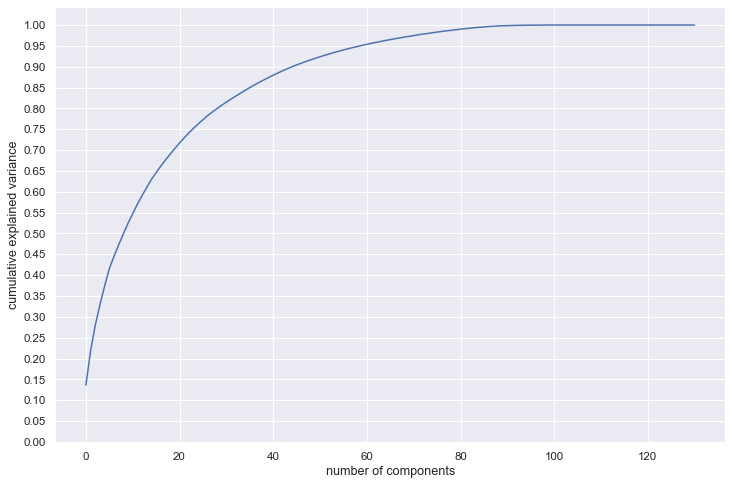

In [243]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

Number of PCA components = 60

In [244]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [245]:
telecom_train_pca = pca_final.fit_transform(X_train_scaled)
telecom_train_pca.shape

(43099, 60)

In [246]:
pc_columns = []
for x in range(1,61):
    pc_columns.append('PC'+str(x))

In [247]:
data_pc_df = pd.DataFrame((telecom_train_pca),columns = pc_columns)

In [248]:
data_pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-1.029254,1.880652,0.734352,-0.223037,0.090242,-0.253209,-0.165688,0.126580,-1.016841,0.198795,-0.006139,0.587008,-0.232382,0.443356,-0.091545,-0.155388,0.205898,0.411112,0.289920,-0.128548,0.032846,0.080821,-0.354363,-0.216407,-0.497625,-0.051621,-0.326409,0.148898,-0.571568,-0.363761,-0.094311,0.064196,0.204707,-0.142664,-0.354483,-0.358578,-0.239835,0.298980,-0.088179,-0.437382,-0.325608,0.024540,0.039179,0.096481,-0.168599,-0.784844,0.009120,0.124109,0.091293,-0.141700,0.606389,-0.130376,0.101893,0.106294,-0.009621,-0.096322,-0.068100,0.127305,0.248499,0.005839
1,1.910239,2.550908,1.987158,-3.476741,0.315499,-1.435969,-2.192017,1.332610,-0.434789,0.006324,-0.093225,0.510140,-0.153183,0.925688,-0.314429,-0.513231,-0.081493,0.389168,-0.194621,-0.558599,0.424943,-0.184277,-1.185666,-0.048199,-0.124107,-0.149962,-0.357876,0.420784,-0.647762,-0.314170,-0.051144,0.183468,-0.070689,-0.010839,0.204003,-1.057101,0.279682,0.284009,0.723893,-0.725289,-0.177304,-0.055099,-0.211497,0.173004,-0.061011,-0.398041,-0.057726,0.016038,0.005012,-0.034891,0.472798,-0.415783,0.156711,0.184407,0.345058,-0.201335,0.052337,-0.019764,0.037626,-0.113177
2,-1.964551,0.453893,1.029435,-0.218850,0.819703,-0.135599,-0.188348,0.271096,-0.319086,0.380046,-0.053175,0.181253,-0.087149,0.335000,0.013815,-0.244818,0.096117,0.187721,0.373732,0.002253,-0.218117,0.102768,0.302341,-0.131808,-0.476125,-0.156948,-0.848932,0.139024,-0.316641,-0.763223,-0.207417,-0.400394,-0.214189,0.335253,0.459125,0.744896,0.987130,-0.281110,-1.264517,0.893874,-0.458508,0.391528,0.276417,-0.209414,-0.396552,0.104056,0.159422,0.383538,0.176270,-0.134218,0.341709,-0.167231,0.064048,-0.134636,-0.246524,-0.183991,-0.080116,-0.187909,-0.123353,-0.007021
3,0.557554,4.562981,-2.928242,2.081107,-2.440749,-0.208772,-0.901709,0.354368,0.472785,-0.707601,-0.214531,-0.372458,-0.518572,0.436439,-0.406941,-0.618437,-0.270219,0.116885,0.480292,-0.017323,-0.255177,0.299641,-0.022769,-0.145188,-0.796158,-0.096442,-0.174916,-0.034187,-0.043425,0.577463,-0.297160,0.336755,1.033243,-0.614736,-0.144825,0.999115,-0.388600,0.013242,0.037760,-0.631719,0.418197,-0.173234,0.222063,-0.128455,0.076232,-0.204893,0.337050,-0.133645,0.068924,0.213336,0.300391,0.151146,-0.156486,0.005997,0.119889,0.147212,0.461190,0.300345,0.333029,-0.022431
4,8.105431,6.630447,1.152235,-4.622223,-0.161338,-1.582708,5.741279,-3.968723,-3.325178,0.758174,-1.656164,1.418498,0.132764,1.784203,0.033332,1.674534,1.190138,0.944218,0.331840,-0.090803,0.098854,0.002438,1.483978,-0.191371,0.050237,0.036794,0.619779,-0.151334,0.502310,-0.089115,-1.360815,-1.431310,1.037630,0.586530,-1.101469,1.444387,0.887261,0.084169,0.201445,-1.455922,-0.396598,-0.406881,1.283932,1.155877,0.703403,0.302168,-0.497942,0.006880,-0.175999,-0.275886,0.083235,0.166705,-0.080074,0.043913,0.342537,-0.009098,-1.115476,0.387918,0.193430,0.034162


In [249]:
data_pc_df.shape

(43099, 60)

In [250]:
data_pc_df.index = X_train_scaled.index

### Logistic Regrassion with PCA

### Model 1

In [251]:
X_pca_lr_1 = sm.add_constant(data_pc_df)
pca_lm1 = sm.GLM(y_train,X_pca_lr_1,family = sm.families.Binomial())
pca_lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43038
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16378.
Date:                Mon, 07 Dec 2020   Deviance:                       32757.
Time:                        11:50:04   Pearson chi2:                 1.02e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5681      0.019    -29.668      0.000      -0.606      -0.531
PC1           -0.3966      0.006    -64.664      0.000      -0.409      -0.385
PC2            0.6642      0.009     74.876      0.000       0.647       0.682
PC3           -0.1283      0.011    -11.549      0.000      -0.150      -0.107
PC4            0.2694      0.009     29.362      0.000       0.251       0.287
PC5            0.0786      0.010      7.533      0.000       0.058       0.099
PC6            0.1235      0.012     10.693      0.000       0.101       0.146
PC7            0.0436      0.009      4.700      0.000       0.025       0.062
PC8            0.2296      0.012     19.305      0.000       0.206       0.253
PC9            0.2970      0.011     26.326      0.000       0.275       0.319
PC10           0.0671      0.014      4.938      0.000       0.040       0.094
PC11          -0.0366      0.016     -2.223      0.026      -0.069      -0.004
PC12          -0.2578      0.015    -16.860      0.000      -0.288      -0.228
PC13           0.0509      0.012      4.231      0.000       0.027       0.074
PC14           0.0811      0.016      5.009      0.000       0.049       0.113
PC15           0.0870      0.015      5.928      0.000       0.058       0.116
PC16           0.1542      0.018      8.785      0.000       0.120       0.189
PC17           0.1057      0.020      5.286      0.000       0.066       0.145
PC18          -0.0682      0.017     -4.002      0.000      -0.102      -0.035
PC19          -0.0825      0.019     -4.445      0.000      -0.119      -0.046
PC20          -0.0694      0.014     -5.064      0.000      -0.096      -0.043
PC21           0.2048      0.016     12.655      0.000       0.173       0.237
PC22          -0.1887      0.018    -10.337      0.000      -0.224      -0.153
PC23          -0.0312      0.016     -1.892      0.059      -0.064       0.001
PC24          -0.0101      0.021     -0.472      0.637      -0.052       0.032
PC25           0.8068      0.020     39.778      0.000       0.767       0.847
PC26          -0.0176      0.018     -0.970      0.332      -0.053       0.018
PC27          -0.3062      0.018    -17.009      0.000      -0.342      -0.271
PC28          -0.0670      0.024     -2.827      0.005      -0.113      -0.021
PC29          -0.0669      0.026     -2.566      0.010      -0.118      -0.016
PC30           0.0187      0.022      0.835      0.404      -0.025       0.063
PC31           0.0637      0.027      2.316      0.021       0.010       0.118
PC32           0.2310      0.019     11.949      0.000       0.193       0.269
PC33          -0.1750      0.021     -8.367      0.000      -0.216      -0.134
PC34           0.0101      0.023      0.441      0.660      -0.035       0.055
PC35          -0.0056      0.023     -0.250      0.803      -0.050       0.039
PC

In [252]:
pca_data_df = data_pc_df.copy()

In [253]:
pca_data_df.drop('PC42',axis = 1,inplace = True)

### Model 2

In [254]:
X_pca_lr_2 = sm.add_constant(pca_data_df)
pca_lm2 = sm.GLM(y_train,X_pca_lr_2,family = sm.families.Binomial())
pca_lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43039
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16378.
Date:                Mon, 07 Dec 2020   Deviance:                       32757.
Time:                        11:50:05   Pearson chi2:                 1.02e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5681      0.019    -29.677      0.000      -0.606      -0.531
PC1           -0.3966      0.006    -64.681      0.000      -0.409      -0.385
PC2            0.6643      0.009     74.900      0.000       0.647       0.682
PC3           -0.1284      0.011    -11.627      0.000      -0.150      -0.107
PC4            0.2694      0.009     29.385      0.000       0.251       0.287
PC5            0.0787      0.010      7.569      0.000       0.058       0.099
PC6            0.1235      0.012     10.693      0.000       0.101       0.146
PC7            0.0436      0.009      4.700      0.000       0.025       0.062
PC8            0.2296      0.012     19.344      0.000       0.206       0.253
PC9            0.2970      0.011     26.328      0.000       0.275       0.319
PC10           0.0672      0.014      4.945      0.000       0.041       0.094
PC11          -0.0366      0.016     -2.222      0.026      -0.069      -0.004
PC12          -0.2577      0.015    -16.901      0.000      -0.288      -0.228
PC13           0.0509      0.012      4.231      0.000       0.027       0.074
PC14           0.0811      0.016      5.009      0.000       0.049       0.113
PC15           0.0869      0.015      5.928      0.000       0.058       0.116
PC16           0.1542      0.018      8.791      0.000       0.120       0.189
PC17           0.1057      0.020      5.287      0.000       0.066       0.145
PC18          -0.0681      0.017     -4.007      0.000      -0.101      -0.035
PC19          -0.0825      0.019     -4.443      0.000      -0.119      -0.046
PC20          -0.0694      0.014     -5.064      0.000      -0.096      -0.043
PC21           0.2048      0.016     12.657      0.000       0.173       0.236
PC22          -0.1888      0.018    -10.408      0.000      -0.224      -0.153
PC23          -0.0312      0.016     -1.893      0.058      -0.064       0.001
PC24          -0.0101      0.021     -0.470      0.638      -0.052       0.032
PC25           0.8069      0.020     39.808      0.000       0.767       0.847
PC26          -0.0177      0.018     -0.977      0.328      -0.053       0.018
PC27          -0.3062      0.018    -17.033      0.000      -0.341      -0.271
PC28          -0.0671      0.024     -2.833      0.005      -0.113      -0.021
PC29          -0.0669      0.026     -2.566      0.010      -0.118      -0.016
PC30           0.0188      0.022      0.838      0.402      -0.025       0.063
PC31           0.0637      0.027      2.315      0.021       0.010       0.118
PC32           0.2311      0.019     11.996      0.000       0.193       0.269
PC33          -0.1750      0.021     -8.368      0.000      -0.216      -0.134
PC34           0.0100      0.023      0.437      0.662      -0.035       0.055
PC35          -0.0056      0.023     -0.250      0.803      -0.050       0.039
PC

In [255]:
pca_data_df.drop('PC56',axis = 1,inplace = True)

### Model 3

In [256]:
X_pca_lr_3 = sm.add_constant(pca_data_df)
pca_lm3 = sm.GLM(y_train,X_pca_lr_3,family = sm.families.Binomial())
pca_lm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43040
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16378.
Date:                Mon, 07 Dec 2020   Deviance:                       32757.
Time:                        11:50:06   Pearson chi2:                 9.19e+13
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5681      0.019    -29.678      0.000      -0.606      -0.531
PC1           -0.3967      0.006    -64.717      0.000      -0.409      -0.385
PC2            0.6643      0.009     74.902      0.000       0.647       0.682
PC3           -0.1280      0.011    -11.710      0.000      -0.149      -0.107
PC4            0.2695      0.009     29.438      0.000       0.252       0.287
PC5            0.0785      0.010      7.582      0.000       0.058       0.099
PC6            0.1235      0.012     10.689      0.000       0.101       0.146
PC7            0.0436      0.009      4.698      0.000       0.025       0.062
PC8            0.2294      0.012     19.428      0.000       0.206       0.253
PC9            0.2972      0.011     26.512      0.000       0.275       0.319
PC10           0.0671      0.014      4.945      0.000       0.040       0.094
PC11          -0.0368      0.016     -2.239      0.025      -0.069      -0.005
PC12          -0.2578      0.015    -16.924      0.000      -0.288      -0.228
PC13           0.0508      0.012      4.230      0.000       0.027       0.074
PC14           0.0809      0.016      5.006      0.000       0.049       0.113
PC15           0.0866      0.015      5.942      0.000       0.058       0.115
PC16           0.1540      0.018      8.795      0.000       0.120       0.188
PC17           0.1060      0.020      5.320      0.000       0.067       0.145
PC18          -0.0677      0.017     -4.009      0.000      -0.101      -0.035
PC19          -0.0824      0.019     -4.446      0.000      -0.119      -0.046
PC20          -0.0695      0.014     -5.072      0.000      -0.096      -0.043
PC21           0.2046      0.016     12.702      0.000       0.173       0.236
PC22          -0.1890      0.018    -10.434      0.000      -0.225      -0.154
PC23          -0.0311      0.016     -1.892      0.059      -0.063       0.001
PC24          -0.0101      0.021     -0.471      0.637      -0.052       0.032
PC25           0.8072      0.020     39.910      0.000       0.768       0.847
PC26          -0.0176      0.018     -0.973      0.331      -0.053       0.018
PC27          -0.3062      0.018    -17.040      0.000      -0.341      -0.271
PC28          -0.0671      0.024     -2.838      0.005      -0.114      -0.021
PC29          -0.0669      0.026     -2.569      0.010      -0.118      -0.016
PC30           0.0189      0.022      0.842      0.400      -0.025       0.063
PC31           0.0638      0.027      2.321      0.020       0.010       0.118
PC32           0.2310      0.019     12.003      0.000       0.193       0.269
PC33          -0.1753      0.021     -8.403      0.000      -0.216      -0.134
PC34           0.0101      0.023      0.442      0.659      -0.035       0.055
PC35          -0.0056      0.023     -0.249      0.803      -0.050       0.039
PC

In [257]:
pca_data_df.drop('PC41',axis = 1,inplace = True)

### Model 4

In [258]:
X_pca_lr_4 = sm.add_constant(pca_data_df)
pca_lm4 = sm.GLM(y_train,X_pca_lr_4,family = sm.families.Binomial())
pca_lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43041
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32757.
Time:                        11:50:07   Pearson chi2:                 7.26e+13
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5680      0.019    -29.679      0.000      -0.605      -0.530
PC1           -0.3967      0.006    -64.638      0.000      -0.409      -0.385
PC2            0.6642      0.009     74.929      0.000       0.647       0.682
PC3           -0.1282      0.011    -11.686      0.000      -0.150      -0.107
PC4            0.2698      0.009     29.561      0.000       0.252       0.288
PC5            0.0784      0.010      7.563      0.000       0.058       0.099
PC6            0.1235      0.012     10.696      0.000       0.101       0.146
PC7            0.0434      0.009      4.678      0.000       0.025       0.062
PC8            0.2295      0.012     19.370      0.000       0.206       0.253
PC9            0.2973      0.011     26.448      0.000       0.275       0.319
PC10           0.0677      0.013      5.022      0.000       0.041       0.094
PC11          -0.0371      0.016     -2.255      0.024      -0.069      -0.005
PC12          -0.2579      0.015    -16.946      0.000      -0.288      -0.228
PC13           0.0506      0.012      4.213      0.000       0.027       0.074
PC14           0.0813      0.016      5.046      0.000       0.050       0.113
PC15           0.0864      0.015      5.932      0.000       0.058       0.115
PC16           0.1543      0.017      8.824      0.000       0.120       0.189
PC17           0.1062      0.020      5.335      0.000       0.067       0.145
PC18          -0.0680      0.017     -4.020      0.000      -0.101      -0.035
PC19          -0.0831      0.018     -4.495      0.000      -0.119      -0.047
PC20          -0.0697      0.014     -5.085      0.000      -0.097      -0.043
PC21           0.2048      0.016     12.708      0.000       0.173       0.236
PC22          -0.1898      0.018    -10.522      0.000      -0.225      -0.154
PC23          -0.0312      0.016     -1.901      0.057      -0.063       0.001
PC24          -0.0093      0.021     -0.437      0.662      -0.051       0.032
PC25           0.8075      0.020     39.955      0.000       0.768       0.847
PC26          -0.0192      0.018     -1.080      0.280      -0.054       0.016
PC27          -0.3053      0.018    -17.085      0.000      -0.340      -0.270
PC28          -0.0701      0.023     -3.103      0.002      -0.114      -0.026
PC29          -0.0676      0.026     -2.602      0.009      -0.119      -0.017
PC30           0.0191      0.022      0.850      0.395      -0.025       0.063
PC31           0.0603      0.026      2.295      0.022       0.009       0.112
PC32           0.2330      0.019     12.474      0.000       0.196       0.270
PC33          -0.1751      0.021     -8.387      0.000      -0.216      -0.134
PC34           0.0094      0.023      0.411      0.681      -0.035       0.054
PC35          -0.0062      0.023     -0.274      0.784      -0.050       0.038
PC

In [259]:
pca_data_df.drop('PC57',axis = 1,inplace = True)

### Model 5

In [260]:
X_pca_lr_5 = sm.add_constant(pca_data_df)
pca_lm5 = sm.GLM(y_train,X_pca_lr_5,family = sm.families.Binomial())
pca_lm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43042
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32757.
Time:                        11:50:08   Pearson chi2:                 8.04e+13
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5678      0.019    -29.678      0.000      -0.605      -0.530
PC1           -0.3966      0.006    -64.640      0.000      -0.409      -0.385
PC2            0.6640      0.009     74.970      0.000       0.647       0.681
PC3           -0.1285      0.011    -11.743      0.000      -0.150      -0.107
PC4            0.2699      0.009     29.562      0.000       0.252       0.288
PC5            0.0786      0.010      7.574      0.000       0.058       0.099
PC6            0.1232      0.012     10.678      0.000       0.101       0.146
PC7            0.0433      0.009      4.665      0.000       0.025       0.062
PC8            0.2300      0.012     19.450      0.000       0.207       0.253
PC9            0.2975      0.011     26.445      0.000       0.275       0.320
PC10           0.0677      0.013      5.021      0.000       0.041       0.094
PC11          -0.0370      0.016     -2.253      0.024      -0.069      -0.005
PC12          -0.2577      0.015    -16.931      0.000      -0.288      -0.228
PC13           0.0506      0.012      4.211      0.000       0.027       0.074
PC14           0.0816      0.016      5.066      0.000       0.050       0.113
PC15           0.0866      0.015      5.946      0.000       0.058       0.115
PC16           0.1548      0.017      8.871      0.000       0.121       0.189
PC17           0.1068      0.020      5.368      0.000       0.068       0.146
PC18          -0.0682      0.017     -4.031      0.000      -0.101      -0.035
PC19          -0.0834      0.018     -4.513      0.000      -0.120      -0.047
PC20          -0.0695      0.014     -5.070      0.000      -0.096      -0.043
PC21           0.2050      0.016     12.719      0.000       0.173       0.237
PC22          -0.1899      0.018    -10.525      0.000      -0.225      -0.155
PC23          -0.0307      0.016     -1.870      0.061      -0.063       0.001
PC24          -0.0092      0.021     -0.432      0.666      -0.051       0.033
PC25           0.8072      0.020     39.954      0.000       0.768       0.847
PC26          -0.0192      0.018     -1.083      0.279      -0.054       0.016
PC27          -0.3055      0.018    -17.094      0.000      -0.341      -0.270
PC28          -0.0702      0.023     -3.109      0.002      -0.115      -0.026
PC29          -0.0672      0.026     -2.585      0.010      -0.118      -0.016
PC30           0.0182      0.022      0.814      0.416      -0.026       0.062
PC31           0.0605      0.026      2.308      0.021       0.009       0.112
PC32           0.2335      0.019     12.527      0.000       0.197       0.270
PC33          -0.1753      0.021     -8.401      0.000      -0.216      -0.134
PC34           0.0093      0.023      0.409      0.682      -0.035       0.054
PC35          -0.0052      0.023     -0.229      0.819      -0.049       0.039
PC

In [261]:
pca_data_df.drop('PC45',axis = 1,inplace = True)

### Model 6

In [262]:
X_pca_lr_6 = sm.add_constant(pca_data_df)
pca_lm6 = sm.GLM(y_train,X_pca_lr_6,family = sm.families.Binomial())
pca_lm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43043
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32758.
Time:                        11:50:09   Pearson chi2:                 1.88e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5675      0.019    -29.673      0.000      -0.605      -0.530
PC1           -0.3959      0.006    -65.102      0.000      -0.408      -0.384
PC2            0.6635      0.009     75.064      0.000       0.646       0.681
PC3           -0.1250      0.010    -12.236      0.000      -0.145      -0.105
PC4            0.2722      0.009     30.970      0.000       0.255       0.289
PC5            0.0769      0.010      7.537      0.000       0.057       0.097
PC6            0.1236      0.012     10.729      0.000       0.101       0.146
PC7            0.0431      0.009      4.639      0.000       0.025       0.061
PC8            0.2296      0.012     19.490      0.000       0.207       0.253
PC9            0.2966      0.011     26.430      0.000       0.275       0.319
PC10           0.0664      0.013      4.955      0.000       0.040       0.093
PC11          -0.0386      0.016     -2.365      0.018      -0.071      -0.007
PC12          -0.2591      0.015    -17.161      0.000      -0.289      -0.230
PC13           0.0504      0.012      4.212      0.000       0.027       0.074
PC14           0.0831      0.016      5.194      0.000       0.052       0.114
PC15           0.0874      0.015      6.013      0.000       0.059       0.116
PC16           0.1531      0.017      8.820      0.000       0.119       0.187
PC17           0.1075      0.020      5.408      0.000       0.069       0.146
PC18          -0.0646      0.016     -3.952      0.000      -0.097      -0.033
PC19          -0.0807      0.018     -4.437      0.000      -0.116      -0.045
PC20          -0.0700      0.014     -5.131      0.000      -0.097      -0.043
PC21           0.2048      0.016     12.746      0.000       0.173       0.236
PC22          -0.1944      0.017    -11.208      0.000      -0.228      -0.160
PC23          -0.0315      0.016     -1.924      0.054      -0.064       0.001
PC24          -0.0086      0.021     -0.405      0.685      -0.050       0.033
PC25           0.8073      0.020     39.950      0.000       0.768       0.847
PC26          -0.0201      0.018     -1.135      0.257      -0.055       0.015
PC27          -0.3056      0.018    -17.074      0.000      -0.341      -0.270
PC28          -0.0736      0.022     -3.279      0.001      -0.118      -0.030
PC29          -0.0669      0.026     -2.573      0.010      -0.118      -0.016
PC30           0.0201      0.022      0.898      0.369      -0.024       0.064
PC31           0.0594      0.026      2.260      0.024       0.008       0.111
PC32           0.2355      0.019     12.670      0.000       0.199       0.272
PC33          -0.1757      0.021     -8.410      0.000      -0.217      -0.135
PC34           0.0111      0.023      0.487      0.626      -0.034       0.056
PC35          -0.0035      0.022     -0.157      0.875      -0.047       0.040
PC

In [263]:
pca_data_df.drop('PC35',axis = 1,inplace = True)

### Model 7

In [264]:
X_pca_lr_7 = sm.add_constant(pca_data_df)
pca_lm7 = sm.GLM(y_train,X_pca_lr_7,family = sm.families.Binomial())
pca_lm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43044
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32758.
Time:                        11:50:10   Pearson chi2:                 1.88e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5675      0.019    -29.675      0.000      -0.605      -0.530
PC1           -0.3958      0.006    -65.112      0.000      -0.408      -0.384
PC2            0.6634      0.009     75.242      0.000       0.646       0.681
PC3           -0.1249      0.010    -12.231      0.000      -0.145      -0.105
PC4            0.2724      0.009     31.153      0.000       0.255       0.290
PC5            0.0768      0.010      7.538      0.000       0.057       0.097
PC6            0.1232      0.011     10.947      0.000       0.101       0.145
PC7            0.0430      0.009      4.636      0.000       0.025       0.061
PC8            0.2296      0.012     19.471      0.000       0.206       0.253
PC9            0.2966      0.011     26.424      0.000       0.275       0.319
PC10           0.0662      0.013      4.958      0.000       0.040       0.092
PC11          -0.0387      0.016     -2.366      0.018      -0.071      -0.007
PC12          -0.2592      0.015    -17.179      0.000      -0.289      -0.230
PC13           0.0504      0.012      4.211      0.000       0.027       0.074
PC14           0.0832      0.016      5.215      0.000       0.052       0.115
PC15           0.0873      0.015      6.010      0.000       0.059       0.116
PC16           0.1531      0.017      8.825      0.000       0.119       0.187
PC17           0.1074      0.020      5.408      0.000       0.068       0.146
PC18          -0.0644      0.016     -3.945      0.000      -0.096      -0.032
PC19          -0.0805      0.018     -4.431      0.000      -0.116      -0.045
PC20          -0.0701      0.014     -5.139      0.000      -0.097      -0.043
PC21           0.2049      0.016     12.763      0.000       0.173       0.236
PC22          -0.1948      0.017    -11.329      0.000      -0.229      -0.161
PC23          -0.0313      0.016     -1.916      0.055      -0.063       0.001
PC24          -0.0086      0.021     -0.405      0.685      -0.050       0.033
PC25           0.8075      0.020     39.989      0.000       0.768       0.847
PC26          -0.0205      0.018     -1.170      0.242      -0.055       0.014
PC27          -0.3057      0.018    -17.082      0.000      -0.341      -0.271
PC28          -0.0738      0.022     -3.291      0.001      -0.118      -0.030
PC29          -0.0670      0.026     -2.577      0.010      -0.118      -0.016
PC30           0.0198      0.022      0.890      0.373      -0.024       0.064
PC31           0.0588      0.026      2.257      0.024       0.008       0.110
PC32           0.2351      0.018     12.736      0.000       0.199       0.271
PC33          -0.1755      0.021     -8.408      0.000      -0.216      -0.135
PC34           0.0113      0.023      0.496      0.620      -0.033       0.056
PC36           0.1668      0.021      8.006      0.000       0.126       0.208
PC

In [265]:
pca_data_df.drop('PC34',axis = 1,inplace = True)

### Model 8

In [266]:
X_pca_lr_8 = sm.add_constant(pca_data_df)
pca_lm8 = sm.GLM(y_train,X_pca_lr_8,family = sm.families.Binomial())
pca_lm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43045
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32759.
Time:                        11:50:11   Pearson chi2:                 1.80e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5670      0.019    -29.684      0.000      -0.604      -0.530
PC1           -0.3956      0.006    -65.314      0.000      -0.407      -0.384
PC2            0.6629      0.009     75.686      0.000       0.646       0.680
PC3           -0.1252      0.010    -12.304      0.000      -0.145      -0.105
PC4            0.2726      0.009     31.214      0.000       0.255       0.290
PC5            0.0771      0.010      7.575      0.000       0.057       0.097
PC6            0.1225      0.011     10.962      0.000       0.101       0.144
PC7            0.0426      0.009      4.613      0.000       0.024       0.061
PC8            0.2295      0.012     19.513      0.000       0.206       0.253
PC9            0.2969      0.011     26.482      0.000       0.275       0.319
PC10           0.0667      0.013      5.007      0.000       0.041       0.093
PC11          -0.0389      0.016     -2.381      0.017      -0.071      -0.007
PC12          -0.2591      0.015    -17.180      0.000      -0.289      -0.230
PC13           0.0507      0.012      4.239      0.000       0.027       0.074
PC14           0.0832      0.016      5.214      0.000       0.052       0.115
PC15           0.0875      0.015      6.028      0.000       0.059       0.116
PC16           0.1528      0.017      8.818      0.000       0.119       0.187
PC17           0.1068      0.020      5.393      0.000       0.068       0.146
PC18          -0.0646      0.016     -3.968      0.000      -0.097      -0.033
PC19          -0.0807      0.018     -4.449      0.000      -0.116      -0.045
PC20          -0.0702      0.014     -5.150      0.000      -0.097      -0.044
PC21           0.2050      0.016     12.762      0.000       0.174       0.237
PC22          -0.1940      0.017    -11.343      0.000      -0.228      -0.160
PC23          -0.0309      0.016     -1.888      0.059      -0.063       0.001
PC24          -0.0089      0.021     -0.421      0.674      -0.050       0.033
PC25           0.8070      0.020     40.018      0.000       0.767       0.847
PC26          -0.0207      0.018     -1.178      0.239      -0.055       0.014
PC27          -0.3087      0.017    -18.297      0.000      -0.342      -0.276
PC28          -0.0718      0.022     -3.266      0.001      -0.115      -0.029
PC29          -0.0655      0.026     -2.539      0.011      -0.116      -0.015
PC30           0.0203      0.022      0.913      0.361      -0.023       0.064
PC31           0.0609      0.026      2.387      0.017       0.011       0.111
PC32           0.2324      0.018     13.240      0.000       0.198       0.267
PC33          -0.1773      0.021     -8.585      0.000      -0.218      -0.137
PC36           0.1654      0.021      8.017      0.000       0.125       0.206
PC37          -0.5813      0.022    -26.969      0.000      -0.624      -0.539
PC

In [267]:
pca_data_df.drop('PC24',axis = 1,inplace = True)

### Model 9

In [268]:
X_pca_lr_9 = sm.add_constant(pca_data_df)
pca_lm9 = sm.GLM(y_train,X_pca_lr_9,family = sm.families.Binomial())
pca_lm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43046
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16379.
Date:                Mon, 07 Dec 2020   Deviance:                       32759.
Time:                        11:50:12   Pearson chi2:                 1.80e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5670      0.019    -29.683      0.000      -0.604      -0.530
PC1           -0.3956      0.006    -65.361      0.000      -0.407      -0.384
PC2            0.6630      0.009     75.691      0.000       0.646       0.680
PC3           -0.1250      0.010    -12.321      0.000      -0.145      -0.105
PC4            0.2727      0.009     31.321      0.000       0.256       0.290
PC5            0.0768      0.010      7.584      0.000       0.057       0.097
PC6            0.1218      0.011     11.004      0.000       0.100       0.144
PC7            0.0426      0.009      4.614      0.000       0.024       0.061
PC8            0.2300      0.012     19.748      0.000       0.207       0.253
PC9            0.2961      0.011     26.920      0.000       0.275       0.318
PC10           0.0678      0.013      5.202      0.000       0.042       0.093
PC11          -0.0396      0.016     -2.443      0.015      -0.071      -0.008
PC12          -0.2604      0.015    -17.652      0.000      -0.289      -0.232
PC13           0.0501      0.012      4.222      0.000       0.027       0.073
PC14           0.0820      0.016      5.212      0.000       0.051       0.113
PC15           0.0863      0.014      6.054      0.000       0.058       0.114
PC16           0.1522      0.017      8.820      0.000       0.118       0.186
PC17           0.1070      0.020      5.433      0.000       0.068       0.146
PC18          -0.0637      0.016     -3.950      0.000      -0.095      -0.032
PC19          -0.0811      0.018     -4.497      0.000      -0.116      -0.046
PC20          -0.0702      0.014     -5.158      0.000      -0.097      -0.044
PC21           0.2046      0.016     12.839      0.000       0.173       0.236
PC22          -0.1935      0.017    -11.347      0.000      -0.227      -0.160
PC23          -0.0299      0.016     -1.860      0.063      -0.061       0.002
PC25           0.8070      0.020     40.016      0.000       0.767       0.847
PC26          -0.0204      0.018     -1.162      0.245      -0.055       0.014
PC27          -0.3085      0.017    -18.299      0.000      -0.342      -0.275
PC28          -0.0716      0.022     -3.260      0.001      -0.115      -0.029
PC29          -0.0651      0.026     -2.533      0.011      -0.116      -0.015
PC30           0.0195      0.022      0.881      0.379      -0.024       0.063
PC31           0.0614      0.025      2.409      0.016       0.011       0.111
PC32           0.2324      0.018     13.254      0.000       0.198       0.267
PC33          -0.1769      0.021     -8.576      0.000      -0.217      -0.136
PC36           0.1651      0.021      8.012      0.000       0.125       0.206
PC37          -0.5824      0.021    -27.256      0.000      -0.624      -0.541
PC38          -0.0737      0.025     -2.949      0.003      -0.123      -0.025
PC

In [269]:
pca_data_df.drop('PC40',axis = 1,inplace = True)

### Model 10

In [270]:
X_pca_lr_10 = sm.add_constant(pca_data_df)
pca_lm10 = sm.GLM(y_train,X_pca_lr_10,family = sm.families.Binomial())
pca_lm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43047
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16381.
Date:                Mon, 07 Dec 2020   Deviance:                       32762.
Time:                        11:50:13   Pearson chi2:                 3.22e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5671      0.019    -29.675      0.000      -0.605      -0.530
PC1           -0.3952      0.006    -65.461      0.000      -0.407      -0.383
PC2            0.6625      0.009     75.722      0.000       0.645       0.680
PC3           -0.1254      0.010    -12.401      0.000      -0.145      -0.106
PC4            0.2713      0.009     31.338      0.000       0.254       0.288
PC5            0.0753      0.010      7.468      0.000       0.056       0.095
PC6            0.1227      0.011     11.113      0.000       0.101       0.144
PC7            0.0432      0.009      4.681      0.000       0.025       0.061
PC8            0.2308      0.012     19.937      0.000       0.208       0.254
PC9            0.2945      0.011     26.886      0.000       0.273       0.316
PC10           0.0691      0.013      5.296      0.000       0.044       0.095
PC11          -0.0396      0.016     -2.439      0.015      -0.071      -0.008
PC12          -0.2626      0.015    -17.762      0.000      -0.292      -0.234
PC13           0.0499      0.012      4.217      0.000       0.027       0.073
PC14           0.0832      0.016      5.262      0.000       0.052       0.114
PC15           0.0889      0.014      6.269      0.000       0.061       0.117
PC16           0.1520      0.017      8.814      0.000       0.118       0.186
PC17           0.1065      0.020      5.382      0.000       0.068       0.145
PC18          -0.0645      0.016     -4.012      0.000      -0.096      -0.033
PC19          -0.0819      0.018     -4.534      0.000      -0.117      -0.046
PC20          -0.0705      0.014     -5.186      0.000      -0.097      -0.044
PC21           0.2055      0.016     12.885      0.000       0.174       0.237
PC22          -0.1911      0.017    -11.264      0.000      -0.224      -0.158
PC23          -0.0315      0.016     -1.966      0.049      -0.063   -9.84e-05
PC25           0.8027      0.020     40.168      0.000       0.764       0.842
PC26          -0.0248      0.017     -1.422      0.155      -0.059       0.009
PC27          -0.3091      0.017    -18.267      0.000      -0.342      -0.276
PC28          -0.0704      0.022     -3.210      0.001      -0.113      -0.027
PC29          -0.0691      0.026     -2.690      0.007      -0.119      -0.019
PC30           0.0216      0.022      0.979      0.327      -0.022       0.065
PC31           0.0625      0.026      2.448      0.014       0.012       0.112
PC32           0.2361      0.018     13.484      0.000       0.202       0.270
PC33          -0.1790      0.021     -8.640      0.000      -0.220      -0.138
PC36           0.1653      0.021      8.026      0.000       0.125       0.206
PC37          -0.5915      0.021    -28.211      0.000      -0.633      -0.550
PC38          -0.0759      0.025     -3.041      0.002      -0.125      -0.027
PC

In [271]:
pca_data_df.drop('PC23',axis = 1,inplace = True)

### Model 11

In [272]:
X_pca_lr_11 = sm.add_constant(pca_data_df)
pca_lm11 = sm.GLM(y_train,X_pca_lr_11,family = sm.families.Binomial())
pca_lm11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43048
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16383.
Date:                Mon, 07 Dec 2020   Deviance:                       32766.
Time:                        11:50:14   Pearson chi2:                 4.09e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5687      0.019    -29.783      0.000      -0.606      -0.531
PC1           -0.3959      0.006    -65.729      0.000      -0.408      -0.384
PC2            0.6629      0.009     75.818      0.000       0.646       0.680
PC3           -0.1265      0.010    -12.445      0.000      -0.146      -0.107
PC4            0.2702      0.009     31.263      0.000       0.253       0.287
PC5            0.0771      0.010      7.668      0.000       0.057       0.097
PC6            0.1174      0.011     10.933      0.000       0.096       0.138
PC7            0.0417      0.009      4.557      0.000       0.024       0.060
PC8            0.2322      0.012     20.188      0.000       0.210       0.255
PC9            0.2961      0.011     27.332      0.000       0.275       0.317
PC10           0.0678      0.013      5.226      0.000       0.042       0.093
PC11          -0.0410      0.016     -2.545      0.011      -0.073      -0.009
PC12          -0.2595      0.015    -17.720      0.000      -0.288      -0.231
PC13           0.0513      0.012      4.331      0.000       0.028       0.074
PC14           0.0881      0.015      5.731      0.000       0.058       0.118
PC15           0.0906      0.014      6.414      0.000       0.063       0.118
PC16           0.1536      0.017      8.918      0.000       0.120       0.187
PC17           0.1083      0.020      5.551      0.000       0.070       0.147
PC18          -0.0641      0.016     -3.988      0.000      -0.096      -0.033
PC19          -0.0863      0.018     -4.898      0.000      -0.121      -0.052
PC20          -0.0672      0.013     -4.980      0.000      -0.094      -0.041
PC21           0.2042      0.016     13.030      0.000       0.174       0.235
PC22          -0.1911      0.017    -11.256      0.000      -0.224      -0.158
PC25           0.8051      0.020     40.396      0.000       0.766       0.844
PC26          -0.0188      0.017     -1.097      0.272      -0.052       0.015
PC27          -0.3100      0.017    -18.369      0.000      -0.343      -0.277
PC28          -0.0698      0.022     -3.187      0.001      -0.113      -0.027
PC29          -0.0726      0.026     -2.847      0.004      -0.123      -0.023
PC30           0.0244      0.022      1.109      0.268      -0.019       0.067
PC31           0.0633      0.025      2.488      0.013       0.013       0.113
PC32           0.2335      0.017     13.408      0.000       0.199       0.268
PC33          -0.1766      0.021     -8.553      0.000      -0.217      -0.136
PC36           0.1601      0.020      7.845      0.000       0.120       0.200
PC37          -0.5905      0.021    -28.308      0.000      -0.631      -0.550
PC38          -0.0784      0.025     -3.160      0.002      -0.127      -0.030
PC39           0.0992      0.020      5.023      0.000       0.061       0.138
PC

In [273]:
pca_data_df.drop('PC26',axis = 1,inplace = True)

### Model 12

In [274]:
X_pca_lr_12 = sm.add_constant(pca_data_df)
pca_lm12 = sm.GLM(y_train,X_pca_lr_12,family = sm.families.Binomial())
pca_lm12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43049
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16384.
Date:                Mon, 07 Dec 2020   Deviance:                       32768.
Time:                        11:50:15   Pearson chi2:                 5.00e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5696      0.019    -29.856      0.000      -0.607      -0.532
PC1           -0.3964      0.006    -65.870      0.000      -0.408      -0.385
PC2            0.6642      0.009     76.546      0.000       0.647       0.681
PC3           -0.1258      0.010    -12.292      0.000      -0.146      -0.106
PC4            0.2705      0.009     31.176      0.000       0.253       0.287
PC5            0.0779      0.010      7.765      0.000       0.058       0.098
PC6            0.1172      0.011     10.903      0.000       0.096       0.138
PC7            0.0419      0.009      4.563      0.000       0.024       0.060
PC8            0.2325      0.012     20.063      0.000       0.210       0.255
PC9            0.2963      0.011     27.248      0.000       0.275       0.318
PC10           0.0672      0.013      5.187      0.000       0.042       0.093
PC11          -0.0409      0.016     -2.537      0.011      -0.073      -0.009
PC12          -0.2586      0.015    -17.648      0.000      -0.287      -0.230
PC13           0.0522      0.012      4.405      0.000       0.029       0.075
PC14           0.0870      0.015      5.675      0.000       0.057       0.117
PC15           0.0916      0.014      6.508      0.000       0.064       0.119
PC16           0.1539      0.017      8.937      0.000       0.120       0.188
PC17           0.1071      0.020      5.493      0.000       0.069       0.145
PC18          -0.0638      0.016     -3.968      0.000      -0.095      -0.032
PC19          -0.0862      0.018     -4.877      0.000      -0.121      -0.052
PC20          -0.0665      0.014     -4.910      0.000      -0.093      -0.040
PC21           0.2023      0.016     12.965      0.000       0.172       0.233
PC22          -0.1901      0.017    -11.175      0.000      -0.223      -0.157
PC25           0.8065      0.020     40.461      0.000       0.767       0.846
PC27          -0.3131      0.017    -18.885      0.000      -0.346      -0.281
PC28          -0.0657      0.021     -3.069      0.002      -0.108      -0.024
PC29          -0.0682      0.025     -2.709      0.007      -0.118      -0.019
PC30           0.0221      0.022      1.010      0.313      -0.021       0.065
PC31           0.0699      0.025      2.852      0.004       0.022       0.118
PC32           0.2298      0.017     13.513      0.000       0.196       0.263
PC33          -0.1736      0.020     -8.517      0.000      -0.214      -0.134
PC36           0.1601      0.020      7.831      0.000       0.120       0.200
PC37          -0.5866      0.021    -28.599      0.000      -0.627      -0.546
PC38          -0.0758      0.024     -3.097      0.002      -0.124      -0.028
PC39           0.0986      0.020      5.001      0.000       0.060       0.137
PC43           0.2888      0.022     12.890      0.000       0.245       0.333
PC

#### All p values in this model are less than 0.05 hence this is a stable model.

### VIF

In [275]:
vif = pd.DataFrame()
vif['Features'] = X_pca_lr_12.columns
vif['VIF'] = [variance_inflation_factor(X_pca_lr_12.values, i) for i in range(X_pca_lr_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.0
37,PC46,1.0
27,PC30,1.0
28,PC31,1.0
29,PC32,1.0
30,PC33,1.0
31,PC36,1.0
32,PC37,1.0
33,PC38,1.0
34,PC39,1.0


In [276]:
y_train_pred = pca_lm12.fit().predict(X_pca_lr_12)

In [277]:
y_train_pred.head()

I12699    0.522578
I17582    0.152188
I27307    0.393244
I6081     0.940263
I19702    0.036182
dtype: float64

In [278]:
y_train.head()

I12699    0
I17582    0
I27307    0
I6081     1
I19702    0
dtype: int64

In [279]:
y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

In [280]:
y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [281]:
y_train_pred_final.head()

,index,churn,churn_prob
0,I12699,0,0.522578
1,I17582,0,0.152188
2,I27307,0,0.393244
3,I6081,1,0.940263
4,I19702,0,0.036182


### ROC Curve

In [282]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [283]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

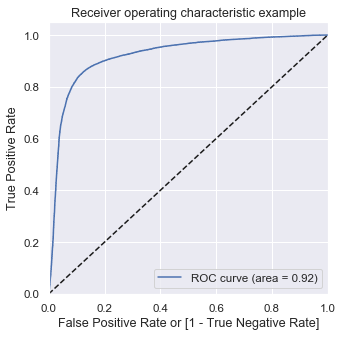

In [284]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

#### ROC curve area for logistic regrssion with PCA is 0.92

### optimal cutoff point

In [285]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,I12699,0,0.522578,1,1,1,1,1,1,0,0,0,0
1,I17582,0,0.152188,1,1,0,0,0,0,0,0,0,0
2,I27307,0,0.393244,1,1,1,1,0,0,0,0,0,0
3,I6081,1,0.940263,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.036182,1,0,0,0,0,0,0,0,0,0


In [286]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.499988  1.000000  0.000000  0.499988
0.1   0.1  0.718485  0.972110  0.464872  0.644951
0.2   0.2  0.776352  0.953548  0.599165  0.704036
0.3   0.3  0.813476  0.932015  0.694942  0.753395
0.4   0.4  0.839579  0.911922  0.767239  0.796651
0.5   0.5  0.858744  0.888023  0.829466  0.838894
0.6   0.6  0.866679  0.855446  0.877912  0.875101
0.7   0.7  0.856795  0.794932  0.918654  0.907165
0.8   0.8  0.814010  0.675345  0.952668  0.934502
0.9   0.9  0.596557  0.208687  0.984408  0.930478


<Figure size 720x360 with 0 Axes>

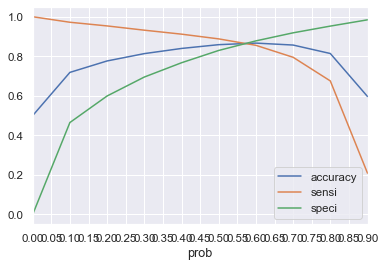

In [287]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.05))
plt.show()

In [288]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5867574300808671

#### Optimal cut off point 0.599

In [289]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.599 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,I12699,0,0.522578,1,1,1,1,1,1,0,0,0,0,0
1,I17582,0,0.152188,1,1,0,0,0,0,0,0,0,0,0
2,I27307,0,0.393244,1,1,1,1,0,0,0,0,0,0,0
3,I6081,1,0.940263,1,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.036182,1,0,0,0,0,0,0,0,0,0,0


In [290]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8666558388825727

In [291]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18911,  2639],
       [ 3108, 18441]], dtype=int64)

In [292]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [293]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8557705693999722

In [294]:
# Let us calculate specificity
TN / float(TN+FP)

0.8775406032482599

In [295]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12245939675174014


In [296]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8748102466793168


In [297]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8588491757118852


In [298]:
# Let's see the sensitivity of our logistic regression model with PCA
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8557705693999722
Specificity: 0.8775406032482599
Precision: 0.8748102466793168


### Test Data Scores

In [299]:
telecom_test_pca = pca_final.transform(X_test_scaled)

test_pc_df = pd.DataFrame((telecom_test_pca),columns = pc_columns)

test_pc_df.index = X_test_scaled.index

In [300]:
test_pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
I40049,-1.404000,2.757908,-0.981552,0.535399,-0.724826,-0.484154,-1.573002,0.740188,1.284267,-0.594701,-0.513441,-0.572235,-0.088088,0.010346,0.080977,-0.050542,-0.283515,-0.212138,0.104685,0.065554,-0.493838,-0.168402,-0.213648,0.069878,-0.588592,-0.123537,-0.437923,-0.491873,0.095224,0.695447,-0.204404,-0.463625,0.453202,-0.002316,-0.627109,0.675593,-0.661822,0.063066,-0.351392,0.180122,0.403854,-0.229740,0.057324,0.463605,0.297605,0.128595,0.075721,-0.191495,-0.119090,0.197939,-0.402043,0.357734,-0.134506,-0.060992,-0.052618,0.009973,-0.349007,0.029947,0.087645,0.035028
I12138,-0.066922,6.349627,-4.382404,5.780854,-3.227251,0.324691,0.844223,-2.618001,-2.565726,0.587504,-0.262971,1.628488,0.195132,0.563030,0.234287,-0.507198,0.995375,0.957213,1.411216,-0.077299,-1.192664,1.900259,1.335226,-0.534363,-1.662613,-1.499938,0.683121,0.263093,0.143015,-0.712176,0.046839,0.207885,-1.012298,-0.004365,0.892372,-1.971558,0.192107,0.234537,-0.493663,-1.045580,-0.467791,0.054974,0.712438,-0.665201,0.019683,-0.253517,-0.010145,0.087139,-0.045824,0.213153,0.690251,0.248543,0.084332,-0.198632,0.036886,-0.180546,-1.502871,-0.124391,-0.071316,-0.066721
I50555,9.254386,15.706448,-9.389532,7.670937,-5.738242,-0.380928,10.528942,-5.029773,0.638834,-0.290979,-2.184807,-1.061921,-0.459376,3.205799,-1.336423,1.264611,2.005917,1.224715,0.867256,0.217590,-0.529255,1.484465,2.636601,-0.670385,-3.938069,-1.231320,0.057009,-1.561145,0.589071,-3.725813,1.448026,2.382574,-2.645998,-0.167053,2.508907,-5.389469,2.589716,0.806991,-1.193552,-0.299656,0.024234,-0.116378,0.528125,-0.058372,0.169421,-0.372733,1.077438,0.466510,-0.014427,0.598597,0.961938,-0.391601,1.237246,0.166612,0.181312,-0.113534,-1.067462,-0.915527,-0.003187,-0.090921
I46310,-3.397851,0.612473,-0.252756,1.511637,0.633959,0.568450,-0.331483,-0.410693,-0.556804,0.629736,0.160422,0.552834,0.426167,0.109746,-0.225596,0.123853,0.367948,-0.228655,-0.803744,-0.609004,0.848923,-0.908642,-0.444765,0.149064,0.184547,-0.658919,-0.093088,0.328432,0.358549,0.177294,0.034503,-0.297155,-0.148374,-0.232216,0.299419,-0.081228,0.646080,-0.567791,0.412844,0.063523,0.512959,-0.189641,-0.024145,0.228655,-0.158462,0.111564,0.048559,0.622387,-0.530595,0.167743,0.095821,-0.062775,-0.104938,0.384293,-0.451549,-0.587534,0.088042,0.097206,0.060956,-0.003454
I8763,-0.957803,-1.440735,0.572631,-0.654223,0.935498,0.217350,0.210442,0.027585,-0.787755,0.098594,0.255646,-0.053778,0.855489,0.286539,-0.613259,-0.162208,-0.100489,0.154646,0.040735,-1.044326,-0.128191,-0.227843,0.703539,0.378363,-0.697859,-0.198724,-0.197298,0.248055,-0.447631,0.097374,0.085139,0.099369,-0.210105,0.088292,-0.164121,0.293591,0.040841,-0.300029,0.547975,-0.248028,0.159046,-0.094007,-0.309141,0.333864,-0.051344,0.307412,-0.020347,0.224737,-0.061847,0.242509,0.562819,-0.102456,0.012615,-0.144230,0.273355,-0.154925,0.014320,-0.074312,-0.386953,-0.046017


In [301]:
X_test_pca_lr = sm.add_constant(test_pc_df[pca_data_df.columns.tolist()])

In [302]:
y_test_pred = pca_lm12.fit().predict(X_test_pca_lr)

In [303]:
y_test_pred.head()

I40049    0.937847
I12138    0.845187
I50555    0.973844
I46310    0.866391
I8763     0.115599
dtype: float64

In [304]:
y_test.head()

I40049    1
I12138    1
I50555    1
I46310    1
I8763     0
dtype: int64

In [305]:
y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})

In [306]:
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [307]:
y_test_pred_final.head()

,index,churn,churn_prob
0,I40049,1,0.937847
1,I12138,1,0.845187
2,I50555,1,0.973844
3,I46310,1,0.866391
4,I8763,0,0.115599


In [308]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.599 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,I40049,1,0.937847,1
1,I12138,1,0.845187,1
2,I50555,1,0.973844,1
3,I46310,1,0.866391,1
4,I8763,0,0.115599,0


In [309]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8607888631090487

In [310]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[4720,  667],
       [ 833, 4555]], dtype=int64)

In [311]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [312]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8453971789161099

In [313]:
# Let us calculate specificity
TN / float(TN+FP)

0.8761834044922963

In [314]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12381659550770373


In [315]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8722711604749138


In [316]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8499909958580947


In [317]:
# Let's see the sensitivity of our logistic regression model with PCA
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8453971789161099
Specificity: 0.8761834044922963
Precision: 0.8722711604749138


#### Model performance parameters of logistic Regression with PCA 
     With train data         With test data 
     Accuracy : 0.86           0.86
     Sensitivity: 0.85         0.84
     Specificity: 0.87         0.87
     Precision: 0.87           0.87

#### The train and test score are consistent therfore the model is stable

### Variabls contributing to Churn

###  Feature selection using RFE

In [318]:
lr_rfe = LogisticRegression()

In [319]:
rfe20 = RFE(lr_rfe, 20)             
rfe20 = rfe20.fit(X_train_scaled, y_train)

In [320]:
print('Selected columns from RFE:')
print(X_train_scaled.columns[rfe20.support_].tolist())

Selected columns from RFE:
['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'monthly_2g_8', 'sachet_2g_8', 'total_amt_6', 'total_amt_6_7', 'total_rech_count_6', 'total_rech_count_7', 'total_rech_count_8']


In [321]:
cols = X_train_scaled.columns[rfe20.support_].tolist()

### Model creation with 20 features

In [322]:
X_model20 = sm.add_constant(X_train_scaled[cols])
logmodel20 = sm.GLM(y_train,X_model20,family = sm.families.Binomial())
logmodel20.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43079
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:52:36   Pearson chi2:                 2.80e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.536e+14   3.23e+05    1.4e+09      0.000    4.54e+14    4.54e+14
offnet_mou_8       -7.646e+14   8.81e+05  -8.68e+08      0.000   -7.65e+14   -7.65e+14
roam_og_mou_8       2.284e+14    3.6e+05   6.35e+08      0.000    2.28e+14    2.28e+14
std_og_t2m_mou_8    5.836e+14   7.83e+05   7.45e+08      0.000    5.84e+14    5.84e+14
loc_ic_mou_8       -6.994e+14   3.95e+05  -1.77e+09      0.000   -6.99e+14   -6.99e+14
total_rech_num_6   -2.645e+14   8.55e+05  -3.09e+08      0.000   -2.64e+14   -2.64e+14
total_rech_num_8   -3.673e+16   5.38e+06  -6.83e+09      0.000   -3.67e+16   -3.67e+16
total_rech_amt_6    6.219e+14   1.53e+06   4.06e+08      0.000    6.22e+14    6.22e+14
total_rech_amt_7    1.721e+14   1.07e+06   1.61e+08      0.000    1.72e+14    1.72e+14
last_day_rch_amt_8 -2.491e+14   3.69e+05  -6.75e+08      0.000   -2.49e+14   -2.49e+14
total_rech_data_8   1.332e+15   1.06e+06   1.26e+09      0.000    1.33e+15    1.33e+15
count_rech_2g_8     1.979e+15   1.52e+06    1.3e+09      0.000    1.98e+15    1.98e+15
count_rech_3g_8    -5.173e+14   7.31e+05  -7.08e+08      0.000   -5.17e+14   -5.17e+14
av_rech_amt_data_8 -3.568e+17   5.31e+07  -6.72e+09      0.000   -3.57e+17   -3.57e+17
monthly_2g_8       -5.443e+14   5.53e+05  -9.84e+08      0.000   -5.44e+14   -5.44e+14
sachet_2g_8        -2.867e+15   2.28e+06  -1.26e+09      0.000   -2.87e+15   -2.87e+15
total_amt_6         -3.75e+14   1.86e+06  -2.01e+08      0.000   -3.75e+14   -3.75e+14
total_amt_6_7      -3.147e+14   2.56e+06  -1.23e+08      0.000   -3.15e+14   -3.15e+14
total_rech_count_6  4.497e+14   1.08e+06   4.16e+08      0.000     4.5e+14     4.5e+14
total_rech_count_7  3.242e+13   8.84e+05   3.67e+07      0.000    3.24e+13    3.24e+13
total_rech_count_8  3.639e+17   5.42e+07   6.72e+09      0.000    3.64e+17    3.64e+17
======================================================================================
"""

In [323]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,count_rech_2g_8,inf
9,total_rech_data_8,inf
11,count_rech_3g_8,inf
19,total_rech_count_8,28093.92
12,av_rech_amt_data_8,26997.38
5,total_rech_num_8,276.87
16,total_amt_6_7,62.95
14,sachet_2g_8,49.68
15,total_amt_6,33.20
6,total_rech_amt_6,22.50


In [324]:
cols.remove('count_rech_3g_8')

### Model with 19 features

In [325]:
X_model19 = sm.add_constant(X_train_scaled[cols])
logmodel19 = sm.GLM(y_train,X_model19,family = sm.families.Binomial())
logmodel19.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43079
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:52:46   Pearson chi2:                 2.78e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.936e+14   3.23e+05   1.53e+09      0.000    4.94e+14    4.94e+14
offnet_mou_8       -7.741e+14   8.81e+05  -8.79e+08      0.000   -7.74e+14   -7.74e+14
roam_og_mou_8       2.268e+14    3.6e+05   6.31e+08      0.000    2.27e+14    2.27e+14
std_og_t2m_mou_8    5.868e+14   7.83e+05   7.49e+08      0.000    5.87e+14    5.87e+14
loc_ic_mou_8         -7.2e+14   3.95e+05  -1.83e+09      0.000    -7.2e+14    -7.2e+14
total_rech_num_6   -2.858e+14   8.55e+05  -3.34e+08      0.000   -2.86e+14   -2.86e+14
total_rech_num_8   -3.786e+16   5.38e+06  -7.04e+09      0.000   -3.79e+16   -3.79e+16
total_rech_amt_6    6.285e+14   1.53e+06    4.1e+08      0.000    6.28e+14    6.28e+14
total_rech_amt_7    1.836e+14   1.07e+06   1.72e+08      0.000    1.84e+14    1.84e+14
last_day_rch_amt_8 -2.401e+14   3.69e+05   -6.5e+08      0.000    -2.4e+14    -2.4e+14
total_rech_data_8  -4.895e+13    1.9e+06  -2.58e+07      0.000    -4.9e+13    -4.9e+13
count_rech_2g_8     2.897e+15   2.62e+06    1.1e+09      0.000     2.9e+15     2.9e+15
av_rech_amt_data_8  -3.68e+17   5.31e+07  -6.93e+09      0.000   -3.68e+17   -3.68e+17
monthly_2g_8       -5.233e+14   5.53e+05  -9.46e+08      0.000   -5.23e+14   -5.23e+14
sachet_2g_8        -2.727e+15   2.28e+06   -1.2e+09      0.000   -2.73e+15   -2.73e+15
total_amt_6        -3.702e+14   1.86e+06  -1.99e+08      0.000    -3.7e+14    -3.7e+14
total_amt_6_7      -3.338e+14   2.56e+06   -1.3e+08      0.000   -3.34e+14   -3.34e+14
total_rech_count_6  4.584e+14   1.08e+06   4.24e+08      0.000    4.58e+14    4.58e+14
total_rech_count_7  4.254e+13   8.84e+05   4.81e+07      0.000    4.25e+13    4.25e+13
total_rech_count_8  3.753e+17   5.42e+07   6.93e+09      0.000    3.75e+17    3.75e+17
======================================================================================
"""

In [326]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,total_rech_count_8,28093.92
11,av_rech_amt_data_8,26997.38
5,total_rech_num_8,276.87
10,count_rech_2g_8,65.85
15,total_amt_6_7,62.95
13,sachet_2g_8,49.68
9,total_rech_data_8,34.52
14,total_amt_6,33.20
6,total_rech_amt_6,22.50
16,total_rech_count_6,11.18


In [327]:
cols.remove('total_rech_count_8')

### Model with 18 features

In [328]:
X_model18 = sm.add_constant(X_train_scaled[cols])
logmodel18 = sm.GLM(y_train,X_model18,family = sm.families.Binomial())
logmodel18.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43080
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:52:55   Pearson chi2:                 2.60e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.171e+14   3.23e+05  -6.72e+08      0.000   -2.17e+14   -2.17e+14
offnet_mou_8       -8.282e+14   8.79e+05  -9.42e+08      0.000   -8.28e+14   -8.28e+14
roam_og_mou_8       3.317e+14   3.57e+05   9.29e+08      0.000    3.32e+14    3.32e+14
std_og_t2m_mou_8    5.834e+14   7.82e+05   7.46e+08      0.000    5.83e+14    5.83e+14
loc_ic_mou_8       -5.132e+14   3.92e+05  -1.31e+09      0.000   -5.13e+14   -5.13e+14
total_rech_num_6   -5.654e+14   8.55e+05  -6.61e+08      0.000   -5.65e+14   -5.65e+14
total_rech_num_8   -2.615e+14   4.74e+05  -5.52e+08      0.000   -2.62e+14   -2.62e+14
total_rech_amt_6    1.046e+15   1.53e+06   6.83e+08      0.000    1.05e+15    1.05e+15
total_rech_amt_7    5.584e+14   1.07e+06   5.23e+08      0.000    5.58e+14    5.58e+14
last_day_rch_amt_8 -3.852e+14   3.67e+05  -1.05e+09      0.000   -3.85e+14   -3.85e+14
total_rech_data_8   6.001e+13    1.9e+06   3.16e+07      0.000       6e+13       6e+13
count_rech_2g_8     5.634e+15   2.61e+06   2.16e+09      0.000    5.63e+15    5.63e+15
av_rech_amt_data_8 -1.088e+14   5.64e+05  -1.93e+08      0.000   -1.09e+14   -1.09e+14
monthly_2g_8        -1.04e+15   5.51e+05  -1.89e+09      0.000   -1.04e+15   -1.04e+15
sachet_2g_8        -5.569e+15   2.27e+06  -2.46e+09      0.000   -5.57e+15   -5.57e+15
total_amt_6            -3e+14   1.86e+06  -1.61e+08      0.000      -3e+14      -3e+14
total_amt_6_7      -1.041e+15   2.56e+06  -4.07e+08      0.000   -1.04e+15   -1.04e+15
total_rech_count_6  6.746e+14   1.08e+06   6.25e+08      0.000    6.75e+14    6.75e+14
total_rech_count_7  3.147e+14   8.81e+05   3.57e+08      0.000    3.15e+14    3.15e+14
======================================================================================
"""

In [329]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,count_rech_2g_8,65.31
15,total_amt_6_7,62.69
13,sachet_2g_8,49.14
9,total_rech_data_8,34.52
14,total_amt_6,33.19
6,total_rech_amt_6,22.46
16,total_rech_count_6,11.15
7,total_rech_amt_7,10.90
17,total_rech_count_7,7.43
0,offnet_mou_8,7.39


In [330]:
cols.remove('count_rech_2g_8')

### Model with 17 features

In [331]:
X_model17 = sm.add_constant(X_train_scaled[cols])
logmodel17 = sm.GLM(y_train,X_model17,family = sm.families.Binomial())
logmodel17.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43081
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:53:04   Pearson chi2:                 7.23e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.397e+15   3.23e+05   4.32e+09      0.000     1.4e+15     1.4e+15
offnet_mou_8       -7.489e+14   8.79e+05  -8.52e+08      0.000   -7.49e+14   -7.49e+14
roam_og_mou_8       2.954e+14   3.56e+05   8.29e+08      0.000    2.95e+14    2.95e+14
std_og_t2m_mou_8    5.877e+14   7.82e+05   7.52e+08      0.000    5.88e+14    5.88e+14
loc_ic_mou_8       -7.386e+14   3.92e+05  -1.88e+09      0.000   -7.39e+14   -7.39e+14
total_rech_num_6   -3.917e+14   8.55e+05  -4.58e+08      0.000   -3.92e+14   -3.92e+14
total_rech_num_8   -5.594e+14   4.74e+05  -1.18e+09      0.000   -5.59e+14   -5.59e+14
total_rech_amt_6    8.502e+14   1.51e+06   5.63e+08      0.000     8.5e+14     8.5e+14
total_rech_amt_7   -2.178e+12   1.03e+06  -2.11e+06      0.000   -2.18e+12   -2.18e+12
last_day_rch_amt_8 -5.317e+14   3.67e+05  -1.45e+09      0.000   -5.32e+14   -5.32e+14
total_rech_data_8   2.712e+14   1.67e+06   1.62e+08      0.000    2.71e+14    2.71e+14
av_rech_amt_data_8 -1.785e+14    5.4e+05   -3.3e+08      0.000   -1.79e+14   -1.79e+14
monthly_2g_8       -1.367e+14   3.73e+05  -3.66e+08      0.000   -1.37e+14   -1.37e+14
sachet_2g_8        -2.863e+14   1.24e+06  -2.31e+08      0.000   -2.86e+14   -2.86e+14
total_amt_6        -8.486e+14   1.86e+06  -4.56e+08      0.000   -8.49e+14   -8.49e+14
total_amt_6_7       8.008e+13    2.5e+06    3.2e+07      0.000    8.01e+13    8.01e+13
total_rech_count_6  5.667e+14   1.08e+06   5.25e+08      0.000    5.67e+14    5.67e+14
total_rech_count_7 -1.918e+14   8.81e+05  -2.18e+08      0.000   -1.92e+14   -1.92e+14
======================================================================================
"""

In [332]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_amt_6_7,59.94
13,total_amt_6,33.19
9,total_rech_data_8,26.83
6,total_rech_amt_6,21.81
12,sachet_2g_8,14.74
15,total_rech_count_6,11.15
7,total_rech_amt_7,10.21
16,total_rech_count_7,7.42
0,offnet_mou_8,7.39
4,total_rech_num_6,6.99


In [333]:
cols.remove('total_amt_6_7')

### Model with 16 features

In [334]:
X_model16 = sm.add_constant(X_train_scaled[cols])
logmodel16 = sm.GLM(y_train,X_model16,family = sm.families.Binomial())
logmodel16.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43082
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:53:13   Pearson chi2:                 2.72e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.891e+14   3.23e+05  -8.94e+08      0.000   -2.89e+14   -2.89e+14
offnet_mou_8       -8.322e+14   8.78e+05  -9.47e+08      0.000   -8.32e+14   -8.32e+14
roam_og_mou_8       2.967e+14   3.56e+05   8.33e+08      0.000    2.97e+14    2.97e+14
std_og_t2m_mou_8    6.399e+14   7.81e+05   8.19e+08      0.000     6.4e+14     6.4e+14
loc_ic_mou_8       -5.628e+14   3.92e+05  -1.44e+09      0.000   -5.63e+14   -5.63e+14
total_rech_num_6   -4.218e+14   7.93e+05  -5.32e+08      0.000   -4.22e+14   -4.22e+14
total_rech_num_8   -1.587e+14   4.62e+05  -3.43e+08      0.000   -1.59e+14   -1.59e+14
total_rech_amt_6    1.537e+15   1.43e+06   1.07e+09      0.000    1.54e+15    1.54e+15
total_rech_amt_7    1.694e+14   4.78e+05   3.55e+08      0.000    1.69e+14    1.69e+14
last_day_rch_amt_8 -3.525e+14   3.65e+05  -9.65e+08      0.000   -3.52e+14   -3.52e+14
total_rech_data_8   5.625e+14    1.6e+06   3.51e+08      0.000    5.62e+14    5.62e+14
av_rech_amt_data_8 -1.933e+14   5.31e+05  -3.64e+08      0.000   -1.93e+14   -1.93e+14
monthly_2g_8       -7.763e+13   3.72e+05  -2.09e+08      0.000   -7.76e+13   -7.76e+13
sachet_2g_8        -4.714e+14   1.21e+06  -3.91e+08      0.000   -4.71e+14   -4.71e+14
total_amt_6        -1.519e+15   1.56e+06  -9.77e+08      0.000   -1.52e+15   -1.52e+15
total_rech_count_6  5.632e+14   1.06e+06   5.34e+08      0.000    5.63e+14    5.63e+14
total_rech_count_7  2.698e+13   5.36e+05   5.04e+07      0.000     2.7e+13     2.7e+13
======================================================================================
"""

In [335]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_data_8,24.60
13,total_amt_6,23.16
6,total_rech_amt_6,19.70
12,sachet_2g_8,13.92
14,total_rech_count_6,10.66
0,offnet_mou_8,7.39
4,total_rech_num_6,6.02
2,std_og_t2m_mou_8,5.84
15,total_rech_count_7,2.75
10,av_rech_amt_data_8,2.70


In [336]:
cols.remove('total_rech_data_8')

### Model with 15 features

In [337]:
X_model15 = sm.add_constant(X_train_scaled[cols])
logmodel15 = sm.GLM(y_train,X_model15,family = sm.families.Binomial())
logmodel15.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43083
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        11:53:21   Pearson chi2:                 7.13e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.396e+15   3.23e+05   4.32e+09      0.000     1.4e+15     1.4e+15
offnet_mou_8       -6.416e+14   8.78e+05   -7.3e+08      0.000   -6.42e+14   -6.42e+14
roam_og_mou_8       3.284e+14   3.56e+05   9.22e+08      0.000    3.28e+14    3.28e+14
std_og_t2m_mou_8    3.904e+14   7.81e+05      5e+08      0.000     3.9e+14     3.9e+14
loc_ic_mou_8       -7.052e+14   3.92e+05   -1.8e+09      0.000   -7.05e+14   -7.05e+14
total_rech_num_6   -3.517e+14    7.7e+05  -4.57e+08      0.000   -3.52e+14   -3.52e+14
total_rech_num_8     -7.6e+14   4.62e+05  -1.64e+09      0.000    -7.6e+14    -7.6e+14
total_rech_amt_6    8.688e+14   1.41e+06   6.14e+08      0.000    8.69e+14    8.69e+14
total_rech_amt_7    1.161e+14   4.71e+05   2.46e+08      0.000    1.16e+14    1.16e+14
last_day_rch_amt_8 -5.967e+14   3.65e+05  -1.63e+09      0.000   -5.97e+14   -5.97e+14
av_rech_amt_data_8 -1.844e+11   3.86e+05  -4.77e+05      0.000   -1.84e+11   -1.84e+11
monthly_2g_8        -1.55e+14   3.63e+05  -4.27e+08      0.000   -1.55e+14   -1.55e+14
sachet_2g_8        -7.183e+13   4.16e+05  -1.73e+08      0.000   -7.18e+13   -7.18e+13
total_amt_6        -8.286e+14   1.52e+06  -5.44e+08      0.000   -8.29e+14   -8.29e+14
total_rech_count_6  4.983e+14   1.04e+06   4.81e+08      0.000    4.98e+14    4.98e+14
total_rech_count_7  3.193e+13   4.83e+05   6.61e+07      0.000    3.19e+13    3.19e+13
======================================================================================
"""

In [338]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_amt_6,22.22
6,total_rech_amt_6,19.14
13,total_rech_count_6,10.27
0,offnet_mou_8,7.38
2,std_og_t2m_mou_8,5.84
4,total_rech_num_6,5.68
14,total_rech_count_7,2.23
7,total_rech_amt_7,2.12
5,total_rech_num_8,2.04
11,sachet_2g_8,1.66


In [339]:
cols.remove('total_amt_6')

### Model with 14 features

In [340]:
X_model14 = sm.add_constant(X_train_scaled[cols])
logmodel14 = sm.GLM(y_train,X_model14,family = sm.families.Binomial())
logmodel14.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43084
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          inf
Time:                        11:53:22   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4915      0.014    -34.516      0.000      -0.519      -0.464
offnet_mou_8          -1.9531      0.067    -29.234      0.000      -2.084      -1.822
roam_og_mou_8          0.8046      0.022     36.722      0.000       0.762       0.848
std_og_t2m_mou_8       1.5200      0.058     26.375      0.000       1.407       1.633
loc_ic_mou_8          -1.6206      0.033    -48.956      0.000      -1.686      -1.556
total_rech_num_6      -0.2534      0.031     -8.231      0.000      -0.314      -0.193
total_rech_num_8      -0.8359      0.023    -36.154      0.000      -0.881      -0.791
total_rech_amt_6       0.5354      0.032     16.612      0.000       0.472       0.599
total_rech_amt_7       0.3844      0.026     15.025      0.000       0.334       0.434
last_day_rch_amt_8    -0.9175      0.022    -40.989      0.000      -0.961      -0.874
av_rech_amt_data_8    -0.0574      0.022     -2.578      0.010      -0.101      -0.014
monthly_2g_8          -0.1899      0.023     -8.276      0.000      -0.235      -0.145
sachet_2g_8           -0.2890      0.026    -11.000      0.000      -0.341      -0.238
total_rech_count_6     0.4043      0.037     11.029      0.000       0.332       0.476
total_rech_count_7     0.0622      0.036      1.737      0.082      -0.008       0.132
======================================================================================
"""

In [341]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,7.36
2,std_og_t2m_mou_8,5.83
12,total_rech_count_6,3.55
4,total_rech_num_6,3.46
6,total_rech_amt_6,2.58
13,total_rech_count_7,2.21
7,total_rech_amt_7,2.11
5,total_rech_num_8,2.04
11,sachet_2g_8,1.60
3,loc_ic_mou_8,1.47


In [342]:
cols.remove('offnet_mou_8')

### Model with 13 features

In [343]:
X_model13 = sm.add_constant(X_train_scaled[cols])
logmodel13 = sm.GLM(y_train,X_model13,family = sm.families.Binomial())
logmodel13.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43085
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          inf
Time:                        11:53:24   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4686      0.014    -33.348      0.000      -0.496      -0.441
roam_og_mou_8          0.4999      0.020     25.224      0.000       0.461       0.539
std_og_t2m_mou_8      -0.0783      0.019     -4.060      0.000      -0.116      -0.041
loc_ic_mou_8          -2.1807      0.030    -73.716      0.000      -2.239      -2.123
total_rech_num_6      -0.1442      0.035     -4.088      0.000      -0.213      -0.075
total_rech_num_8      -0.8898      0.023    -38.106      0.000      -0.936      -0.844
total_rech_amt_6       0.4469      0.032     13.774      0.000       0.383       0.511
total_rech_amt_7       0.2553      0.026      9.758      0.000       0.204       0.307
last_day_rch_amt_8    -0.9953      0.022    -44.462      0.000      -1.039      -0.951
av_rech_amt_data_8    -0.0537      0.022     -2.414      0.016      -0.097      -0.010
monthly_2g_8          -0.1859      0.023     -8.155      0.000      -0.231      -0.141
sachet_2g_8           -0.2953      0.027    -10.862      0.000      -0.349      -0.242
total_rech_count_6     0.3243      0.045      7.246      0.000       0.237       0.412
total_rech_count_7     0.1653      0.039      4.234      0.000       0.089       0.242
======================================================================================
"""

In [344]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_count_6,3.54
3,total_rech_num_6,3.43
5,total_rech_amt_6,2.56
12,total_rech_count_7,2.20
6,total_rech_amt_7,2.05
4,total_rech_num_8,1.96
10,sachet_2g_8,1.60
8,av_rech_amt_data_8,1.42
1,std_og_t2m_mou_8,1.33
9,monthly_2g_8,1.26


#### All p values are less than 0.05 and all VIFs are less than 5. Therefore this is stable model.

In [345]:
y_train_pred = logmodel13.fit().predict(X_model13)

In [346]:
y_train_pred.head()

I12699    0.571672
I17582    0.136575
I27307    0.620877
I6081     0.857502
I19702    0.073757
dtype: float64

In [347]:
y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

In [348]:
y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [349]:
y_train_pred_final.head()

,index,churn,churn_prob
0,I12699,0,0.571672
1,I17582,0,0.136575
2,I27307,0,0.620877
3,I6081,1,0.857502
4,I19702,0,0.073757


In [350]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

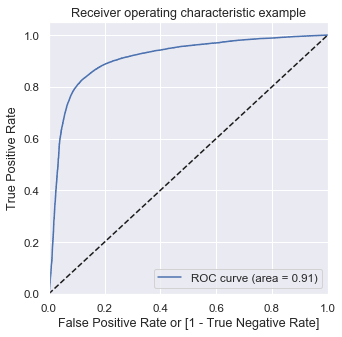

In [351]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

### optimal cutoff point

In [352]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,I12699,0,0.571672,1,1,1,1,1,1,0,0,0,0
1,I17582,0,0.136575,1,1,0,0,0,0,0,0,0,0
2,I27307,0,0.620877,1,1,1,1,1,1,1,0,0,0
3,I6081,1,0.857502,1,1,1,1,1,1,1,1,1,0
4,I19702,0,0.073757,1,0,0,0,0,0,0,0,0,0


In [353]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.499988  1.000000  0.000000  0.499988
0.1   0.1  0.676280  0.972296  0.380278  0.610721
0.2   0.2  0.741897  0.955404  0.528399  0.669507
0.3   0.3  0.786863  0.934707  0.639026  0.721393
0.4   0.4  0.819509  0.914335  0.724687  0.768568
0.5   0.5  0.842479  0.888904  0.796056  0.813376
0.6   0.6  0.851783  0.848253  0.855313  0.854279
0.7   0.7  0.848024  0.783934  0.912111  0.899186
0.8   0.8  0.760226  0.557520  0.962923  0.937641
0.9   0.9  0.548226  0.105666  0.990766  0.919628


<Figure size 720x360 with 0 Axes>

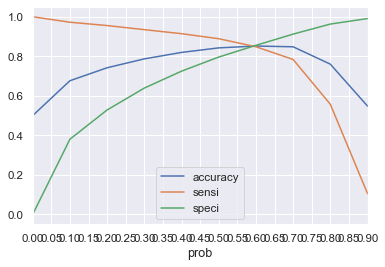

In [354]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.05))
plt.show()

In [355]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6428206076540951

#### From the curve above, 0.64 is the optimum point to take it as a cutoff probability.

In [356]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.64 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,I12699,0,0.571672,1,1,1,1,1,1,0,0,0,0,0
1,I17582,0,0.136575,1,1,0,0,0,0,0,0,0,0,0
2,I27307,0,0.620877,1,1,1,1,1,1,1,0,0,0,0
3,I6081,1,0.857502,1,1,1,1,1,1,1,1,1,0,1
4,I19702,0,0.073757,1,0,0,0,0,0,0,0,0,0,0


In [357]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8532680572635096

In [358]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18916,  2634],
       [ 3690, 17859]], dtype=int64)

In [359]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [360]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.828762355561743

In [361]:
# Let us calculate specificity
TN / float(TN+FP)

0.8777726218097448

In [362]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12222737819025523


In [363]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8367689993806954


In [364]:
# Let's see the sensitivity of our logistic regression model with PCA
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.828762355561743
Specificity: 0.8777726218097448
Precision: 0.871468306250915


### Test scores

In [365]:
y_test_pred = logmodel13.fit().predict(sm.add_constant(X_test_scaled[cols]))

In [366]:
y_test_pred.head()

I40049    0.897569
I12138    0.924486
I50555    0.988741
I46310    0.873707
I8763     0.214260
dtype: float64

In [367]:
y_test.head()

I40049    1
I12138    1
I50555    1
I46310    1
I8763     0
dtype: int64

In [368]:
y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})

In [369]:
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [370]:
y_test_pred_final.head()

,index,churn,churn_prob
0,I40049,1,0.897569
1,I12138,1,0.924486
2,I50555,1,0.988741
3,I46310,1,0.873707
4,I8763,0,0.214260


In [371]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.64 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,I40049,1,0.897569,1
1,I12138,1,0.924486,1
2,I50555,1,0.988741,1
3,I46310,1,0.873707,1
4,I8763,0,0.214260,0


In [372]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8464037122969837

In [373]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[4712,  675],
       [ 980, 4408]], dtype=int64)

In [374]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [375]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8181143281365999

In [376]:
# Let us calculate specificity
TN / float(TN+FP)

0.8746983478745127

In [377]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.12530165212548727


In [378]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8672044068463506


In [379]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8278285312719607


In [380]:
# Let's see the sensitivity of our logistic regression model with PCA
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8181143281365999
Specificity: 0.8746983478745127
Precision: 0.8672044068463506


#### The train and test score are consistent therfore the model is not overfitting

In [381]:
print(logmodel13.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43085
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          inf
Time:                        11:53:28   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4686      0

### Random forest with pca

In [382]:
rfc = RandomForestClassifier()
rfc.fit(data_pc_df,y_train)

RandomForestClassifier()

In [383]:
y_train_pred = rfc.predict(data_pc_df)

In [384]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [385]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21550
           1       1.00      1.00      1.00     21549

    accuracy                           1.00     43099
   macro avg       1.00      1.00      1.00     43099
weighted avg       1.00      1.00      1.00     43099



In [386]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred))

[[21550     0]
 [    0 21549]]


In [387]:
print(accuracy_score(y_train,y_train_pred))

1.0


### Test Set 

In [388]:
y_test_pred = rfc.predict(test_pc_df)

In [389]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5387
           1       0.93      0.95      0.94      5388

    accuracy                           0.94     10775
   macro avg       0.94      0.94      0.94     10775
weighted avg       0.94      0.94      0.94     10775



In [390]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[4984  403]
 [ 245 5143]]


In [391]:
print(accuracy_score(y_test,y_test_pred))

0.9398607888631091


In [392]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [500,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(data_pc_df,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rfc_final = RandomForestClassifier(n_estimators = 1000,max_depth = 20,bootstrap = True,random_state = 28)

In [ ]:
rfc_final.fit(data_pc_df,y_train)

In [ ]:
print(classification_report(y_train,y_train_pred))

In [ ]:
# confusion matrix
print(confusion_matrix(y_train,y_train_pred))

In [ ]:
print(accuracy_score(y_train,y_train_pred))

#### random forest with PCA - train data and test data accuracy is same(1.0)

### Results:

- Random forest with PCA has better prediction capability than the logistic regression with comparitively higher accuracy.
- std_og_t2m_mou_8, loc_ic_mou_8, last_day_rch_amt_8, total_rech_num_8,sachet_2g_8,monthly_2g_8,total_rech_num_6 are effecting the churn negatively are decreasing the probability of churn.
- roam_og_mou_8, total_rech_count_6, total_rech_amt_6, total_rech_amt_7 are affecting the churn positively, increasing the probability of churn.
- From this we can say that roaming variables and std variables are causing churn apart of recharge amount and recharge num.

### Reccommondations to retain the customers
- Keep less the roaming charges as this is one of the reasons for pre-paid customers to look out local operators when on roaming.
- Some new plans for std outgoing calls will also help to retain the customers
- Many customized pre-paid plan tarrifs can be issued, so user feels the advantage of the tarriffs.

- For regular long term customers, can give high quality service, hence the customer does not give second thought of changing the operator with some discounts, to retain the customer for long period.
- Try to resolve the concerns of the customers whose internet service usage, outgoing calls rate is getting reduced for the consecutive months.
